# Importación librerías

In [1]:
# Start writing code h## IMPORTAMOS LA LIBRERIA PARA EL SISTEMA SLIT ###
!pip install lcapy
!pip install folium==0.2.1
!pip install pdflatex
!sudo apt-get install texlive-latex-recommended 
!sudo apt install texlive-latex-extra
!sudo apt install dvipngere...

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.0/410.0 KB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 84.2 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 KB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for folium: filename=folium-0.2.1-py3-none-any.whl size=79812 sha256=a2746d877caadb607addf0fe61edda2e9cc3c7fa5abba10428d0602d9998c431
  Stored in directory: /root/.cache/pip/wheels/47/2a/da/acfca4f9cb052fe6965a6b1b472e62ee2c4c36cecd859233f1
Successfully built folium
  Attempting uninstall: folium
    Found existing installation: folium 0.13.0
    Not uninstalling folium at /shared-libs/python3.9/py/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'folium'. No files were found to uninstall.
ERROR: pip's dependency resolver does not currently take into account all th

In [2]:
!pip uninstall sympy

Found existing installation: sympy 1.11.1
Not uninstalling sympy at /shared-libs/python3.9/py/lib/python3.9/site-packages, outside environment /root/venv
Can't uninstall 'sympy'. No files were found to uninstall.


In [3]:
pip install sympy==1.10.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 47.4 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.11.1
    Uninstalling sympy-1.11.1:
ERROR: Could not install packages due to an OSError: [Errno 30] Read-only file system: '/shared-libs/python3.9/py/bin/isympy'

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.8/432.8 KB 33.7 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [124]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ## LIBRERIA PARA HISTOGRAMA 
import scipy.fftpack as fourier
from scipy.fftpack import fft, fftfreq, fftshift, ifft
from lcapy import Circuit, j, omega, s
from numpy import logspace
import sympy as sym
from scipy.signal import lti 

from control.matlab import *
import control as ct

import math
import random 
from math import *
import copy

from sklearn.model_selection import train_test_split
from tensorflow.keras import models,optimizers,regularizers ## IMPORTAMOS LOS OPTIMIZADORES Y REGULARIZERS PARA EVITAR
## EL OVERFITTING.
from tensorflow.keras.models import Sequential ## PARA LAS CAPAS DENSAS.

# Definición Funciones

In [125]:
##FUNCIONES A UTILIZAR (TRANSFORMADA DE FOURIER)
#Función que Gráfica la transformada de Fourier y la función en el tiempo:
def fftp(t, signal,x,y=None):          #X es el intervalo simétrico en que quiero graficar el dominio de la frecuencia F.
  ft = fftshift(fft(signal))   #Saca la transformada de fourier centrada en cero(fft calcula la transformada de fourier como tal y el fftshift la centra). La fft es un algoritmo para calcular la transformada discreta de Fourier.
  w = fftshift(fftfreq(ft.shape[0],t[1]-t[0]))  #Se le saca el vector de frecuencias(Obviamente el vector de frecuencia debe tener el mismo tamaño del vector de tiempo y obviamente x(t) tiene el mismo tamaño que X(w))(ft.shape[0] es el tamaño del vector transformada de Fourier). También se utiliza el fftshift para lo mismo. El primer parámetro de fftfreq es el tamaño del vector de frecuencia y el segundo es el delta que hay entre cada w y por tanto entre cada t.
  mag = np.sqrt((ft.real**2)+(ft.imag**2))   #Magnitud del espectro
  phase = np.arctan(ft.imag/ft.real)         #Fase del espectro

  #Grafica de la señal en el tiempo:
  plt.figure(figsize=(14,12))   #Tamaño de la imagen de la gráfica
  plt.subplot(511) 
  plt.title('x(t)')
  plt.plot(t, signal)
  plt.grid()
  #Grafica de la parte imaginaría de la transformada de Fourier:
  plt.figure(figsize=(14,12))
  plt.subplot(512)  #Tengo 5 gráficas (Esta está en la columna 1, fila 2) 
  plt.title('Im{TF}')
  plt.plot(w, ft.imag)
  plt.grid()
  if y!=None:
     plt.ylim(-y,y)
  plt.xlim(-x,x)
  #Gráfica de la parte real de la transformada de Fourier:
  plt.figure(figsize=(14,12))
  plt.subplot(513)  #Tengo 4 gráficas (Esta está en la columna 1, fila 2) 
  plt.title('Re{TF}')
  plt.plot(w, ft.real)
  plt.grid()
  if y!=None:
     plt.ylim(-y,y)
  plt.xlim(-x,x)
  #Gráfica de la magnitud de la transformada de Fourier:
  plt.subplot(514)
  plt.plot(w,mag)
  plt.title('|FT|')
  plt.grid()
  if y!=None:
     plt.ylim(-y,y)
  plt.xlim(-x,x)
  #Gráfica de la fase -de la transformada de Fourier:
  plt.subplot(515)
  plt.plot(w,phase,'-',color='orange') #Grafica continua
  plt.stem(w,phase) #Grafica discreta
  plt.title('Phase')
  plt.grid()
  if y!=None:
     plt.ylim(-y,y)
  plt.xlim(-x,x)
  plt.xlabel('Frequency [Hz]')
  plt.show()


def Ploteo_tiempo_frecuencia2promedio(tiempo,funcion,xmax=None,ymax=None):
    # La frequencia de muestreo la extraigo del vector del tiempo
    Frecuencia_muestreo= t[1] - t[0]
    μ = 0
    sd = 0.1
    i=0
    mediaW = []
    mediaY = []
    N = 4096
    while i < 31:
        X = np.random.normal(μ, sd, N) ## FDP GAUSSIANA REAL  
        autoco = autocross(funcion,funcion)
        i+=1
        for j in range(len(funcion)):
            Y = fftshift(fft(autoco))  
            W = fftshift(fftfreq(Y.shape[0], Frecuencia_muestreo))
            meanW = W[j].mean()
            meanY = Y[j].mean()
            mediaY.append(meanY)
            mediaW.append(meanW)
    mediaY = np.array(mediaY)

    # Y = fftshift(fft(Funcion_tiempo))  
    # W = fftshift(fftfreq(Y.shape[0], Frecuencia_muestreo))  # Vector de frecuencias
    p=np.linspace(0,mediaY.shape[0],len(mediaY))
    
    #  Inicializa la figura con un tamaño adecuado 
    Ym = Y.mean()
    Wm = W.mean()
    print(Ym)
    print(Wm)
    plt.figure(figsize=(25, 5), dpi=90)
    plt.plot(p, np.abs(mediaY)**2, color='C1')  # grafica el contorno
    #y=np.full_like(tiempo, 0.02)
    #plt.plot(W,y,color='C1')
    plt.title('Representación en Frecuencia')    
    plt.grid(True)
    if xmax!=None: 
          plt.xlim(-xmax,xmax)
    if ymax!=None:
          plt.ylim(-ymax,ymax)
    plt.xlabel('Frequencia [Hz]')
    plt.ylabel('Amplitud')
    plt.show()

    return Ym



def Ploteo_tiempo_frecuencia2(tiempo,Funcion_tiempo,xmax=None,ymax=None):
    # La frequencia de muestreo la extraigo del vector del tiempo
    Frecuencia_muestreo= t[1] - t[0]
    Y = fftshift(fft(Funcion_tiempo))  
    W = fftshift(fftfreq(Y.shape[0], Frecuencia_muestreo))  # Vector de frecuencias
    
    #  Inicializa la figura con un tamaño adecuado 
    Ym = Y.mean()
    # print(Ym)
    plt.figure(figsize=(25, 5), dpi=90)
    plt.plot(W, np.abs(Y)**2, color='C1')  # grafica el contorno
    plt.title('Representación en Frecuencia')    
    plt.grid(True)
    if xmax!=None: 
          plt.xlim(-xmax,xmax)
    if ymax!=None:
          plt.ylim(-ymax,ymax)
    plt.xlabel('Frequencia [Hz]')
    plt.ylabel('Amplitud')
    plt.show()

    return Ym

# _ = Ploteo_tiempo_frecuencia2(t,Autocorrelation_Output,xmax=30,ymax=None)
def Ploteo_tiempo_frecuencia2do(tiempo,Función_Entrada, Funcion_tiempo,xmax=None,ymax=None):
    # La frequencia de muestreo la extraigo del vector del tiempo
    Frecuencia_muestreo= t[1] - t[0]
    Y = fftshift(fft(Funcion_tiempo))  
    W = fftshift(fftfreq(Y.shape[0], Frecuencia_muestreo))  # Vector de frecuencias

    Y = Y/np.max(Y)
    W = W/np.max(W)

    #  Inicializa la figura con un tamaño adecuado 
    Ym = Y.mean()
    print(Ym)
    plt.figure(figsize=(25, 5), dpi=90)
    plt.plot(W, np.abs(Y)**2, color='C1',label='Función de Salida')  # grafica el contorno
    
    Frecuencia_muestreo= t[1] - t[0]
    X = fftshift(fft(Función_Entrada))  
    W1 = fftshift(fftfreq(Y.shape[0], Frecuencia_muestreo))  # Vector de frecuencias

    X = X/np.max(X)
    W1 = W1/np.max(W1)

    plt.plot(W1, np.abs(X)**2, color='C2',label='Función Entrada')  # grafica el contorno

    plt.title('Representación en Frecuencia')    
    plt.grid(True)
    if xmax!=None: 
          plt.xlim(-xmax,xmax)
    if ymax!=None:
          plt.ylim(-ymax,ymax)
    plt.xlabel('Frequencia [Hz]')
    plt.ylabel('Amplitud')
    plt.xscale("log")
    plt.yscale("log")
    plt.legend()
    plt.show()

    return Ym


def Ploteo_tiempo_frecuencia2inv(tiempo,Función_Entrada, Funcion_tiempo,xmax=None,ymax=None):
    # La frequencia de muestreo la extraigo del vector del tiempo
    Frecuencia_muestreo= t[1] - t[0]
    Y = fftshift(fft(Funcion_tiempo))  
    W = fftshift(fftfreq(Y.shape[0], Frecuencia_muestreo))  # Vector de frecuencias

    Y = ifft(Y/np.max(Y))
    W = W/np.max(W)

    #  Inicializa la figura con un tamaño adecuado 
    Ym = Y.mean()
    print(Ym)
    plt.figure(figsize=(25, 5), dpi=90)
    plt.plot(W, np.abs(Y)**2, color='C1',label='Función de Salida')  # grafica el contorno
    
    Frecuencia_muestreo= t[1] - t[0]
    X = fftshift(fft(Función_Entrada))  
    W1 = fftshift(fftfreq(Y.shape[0], Frecuencia_muestreo))  # Vector de frecuencias

    X = ifft(X/np.max(X))
    W1 = W1/np.max(W1)

    plt.plot(W1, np.abs(X)**2, color='C2',label='Función Entrada')  # grafica el contorno

    plt.title('Representación en Frecuencia')    
    plt.grid(True)
    if xmax!=None: 
          plt.xlim(-xmax,xmax)
    if ymax!=None:
          plt.ylim(-ymax,ymax)
    plt.xlabel('Frequencia [Hz]')
    plt.ylabel('Amplitud')
    plt.xscale("log")
    plt.yscale("log")
    plt.legend()
    plt.show()

    return Ym    

In [7]:
def promEspectroPot(num_generaciones, num_muestras, base_tiempo, xmax=None, ymax=None):

    '''
    brief: Function to generate the same signal multiple times (num_generations), output the power spectrum of each generation, 
           take the point-to-point average of several data sets of a signal, and plot the average power spectrum.

    parameters:
        num_generaciones: number of data sets you want to create for averaging
        num_muestras:     amount of each data set
        base_tiempo:      linear space where each signal lives
        xmax:             horizontal limits of the graph
        ymas:             upper limit of the graph

    return: averaged spectrum average
    '''

    espectroPot = []
    espectroPotReal = []

    Frecuencia_muestreo = t[1] - t[0]
    Y = fftshift(fft(base_tiempo))
    W = fftshift(fftfreq(Y.shape[0], Frecuencia_muestreo))


    for i in range(num_generaciones):

        # Señal a creae repetida mente
        X = np.random.normal(0, 0.3, num_muestras)  


        Autocorrelation_X = autocross(X,X) 
        espectroPot.append(np.fft.fft(Autocorrelation_X))
    
    for k in range(num_muestras):
        suma = 0
        for j in range(num_generaciones):
            suma = suma + espectroPot[j][k]
        
        espectroPotReal.append(suma/num_generaciones)

    plt.plot(W, np.abs(espectroPotReal), color='C2',label='Espectro Promediado')  # grafica el contorno
    plt.title('Representación en Frecuencia Prom')    
    plt.grid(True)
    if xmax!=None: 
            plt.xlim(-xmax,xmax)
    if ymax!=None:
          plt.ylim(0,ymax)
    plt.xlabel('Frequencia [Hz]')
    plt.ylabel('Amplitud')
    plt.legend()
    plt.show()

    return np.mean(espectroPotReal)


In [8]:
#gausPot = promEspectroPot(2000, 4096, t, xmax=10, ymax=0.8)
#print(gausPot)

In [9]:
# Function for calculating autocorrelation without zero-padding

def autocross(x, y):
    c = np.correlate(x-np.mean(x), y-np.mean(y), "same")
    v = [c[i]/( len(x)-abs( i - (len(x)/2)  ) ) for i in range(len(c))]
    return v

In [10]:
# Function for calculating autocorrelation without zero-padding

def autocross2(x, y):
    c = np.correlate(x, y, "same")
    v = [c[i]/( len(x)-abs( i - (len(x)/2)  ) ) for i in range(len(c))]
    # media_corr=v.mean()
    # a=np.full_like(v, media_corr)
    # plt.plot(x,a,color='C1')

    medias=[]
    for j in range(len(v)):

        mediav = v[j].mean()
        medias.append(mediav)

    return medias


# Construcción Circuito

In [54]:
N = 4096

########### CONTRUIMOS EL CIRCUITO##########################:

ctt=Circuit("""
Vi 1 0_1 step;down
C1 1 2; right, size=1.5
R1 2 0; down, size=1.5
C2 2 3; right, size=1.5
R3 2 3; right, offset=0.7
R2 3 0_3; down , v=(V_o)
W 0_1 0;right
W 0 0_3;right
"""
)

In [55]:
##GENERAMOS LA FUNCIÓN DE TRANSFERENCIA DEL CIRCUITO TOMANDO LA SALIDA EN R2
H=(ctt.R2.V(s)/ctt.Vi.V(s)).simplify()
H

                            C₁⋅R₁⋅R₂⋅s⋅(C₂⋅R₃⋅s + 1)                          
──────────────────────────────────────────────────────────────────────────────
                2                                                             
C₁⋅C₂⋅R₁⋅R₂⋅R₃⋅s  + R₁ + R₂ + R₃ + s⋅(C₁⋅R₁⋅R₂ + C₁⋅R₁⋅R₃ + C₂⋅R₁⋅R₃ + C₂⋅R₂⋅R

  
──
  
₃)

In [56]:
#Dando valores al circuito:
C1=4.7e-6
C2=4.7e-6
R1=10000
R2=2500
R3=1000
Coeficientes_num=[C1*C2*R1*R2*R3, C1*R1*R2, 0] #Coeficientes numerador
Coeficientes_dem=[C1*C2*R1*R2*R3, C1*R1*R2 + C1*R1*R3 + C2*R1*R3 + C2*R2*R3, R1 + R2 + R3] #Coeficientes denominador

## Diagrama de Bode y Respuesta al Impulso

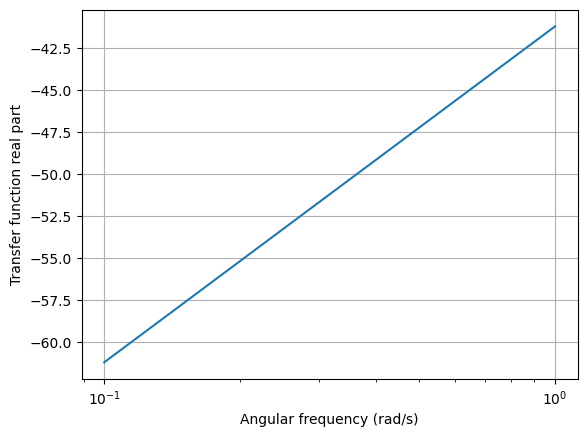

In [57]:
### LE ASIGNAMOS LOS VALORES A NUESTRA FUNCIÓN DE TRANSFERENCIA PARA VER EL COMPORTAMIENTO DEL CIRCUITO
### ASOCIADO A LOS PARAMETROS:
H_valores=H.subs("C1",C1).subs("C2",C2).subs("R1",R1).subs("R2",R2).subs("R3",R3)
W=logspace(-1,0,2000) ## GENERAMOS VECTOR DE FRECUENCIAS EN ESCALA LOGARITMICA
X=H_valores(j*omega).dB.plot(W,log_frequency=True) ## GRAFICAMOS SEGUN UN VECTOR DE FRECUENCIAS

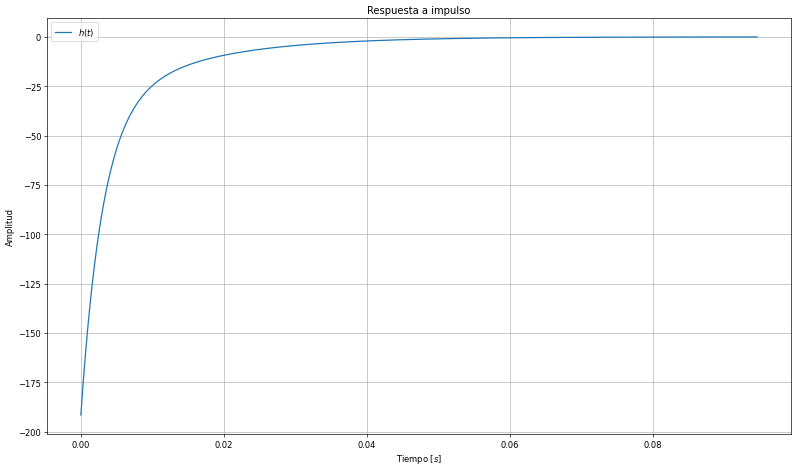

In [58]:
lti_system = lti(Coeficientes_num, Coeficientes_dem)   #LTI
Nsample=4096 ## CANTIDAD DE MUESTRAS
t, h = lti_system.impulse(N=N) # sistema LTI exitado con la función impulso
## NOS DEVUELVE 

plt.figure(figsize=(16, 9), dpi=60)
plt.plot(t, h, label='$h(t)$')

plt.grid(True)
plt.legend()
plt.title("Respuesta a impulso")
plt.xlabel("Tiempo [$s$]")
plt.ylabel("Amplitud")
plt.show()

In [59]:
sys = ct.tf(Coeficientes_num,Coeficientes_dem)


(array([0.08630923, 0.08689803, 0.08749072, 0.0880873 , 0.08868781,
        0.08929227, 0.08990069, 0.09051311, 0.09112954, 0.09175001,
        0.09237455, 0.09300317, 0.0936359 , 0.09427276, 0.09491377,
        0.09555897, 0.09620837, 0.09686199, 0.09751987, 0.09818202,
        0.09884846, 0.09951923, 0.10019435, 0.10087383, 0.1015577 ,
        0.102246  , 0.10293873, 0.10363593, 0.10433762, 0.10504383,
        0.10575457, 0.10646987, 0.10718976, 0.10791426, 0.1086434 ,
        0.1093772 , 0.11011568, 0.11085886, 0.11160679, 0.11235946,
        0.11311692, 0.11387919, 0.11464629, 0.11541824, 0.11619507,
        0.1169768 , 0.11776346, 0.11855507, 0.11935167, 0.12015326,
        0.12095987, 0.12177154, 0.12258828, 0.12341012, 0.12423708,
        0.12506919, 0.12590647, 0.12674894, 0.12759663, 0.12844957,
        0.12930777, 0.13017126, 0.13104007, 0.13191421, 0.13279371,
        0.1336786 , 0.1345689 , 0.13546463, 0.13636581, 0.13727248,
        0.13818464, 0.13910233, 0.14002556, 0.14

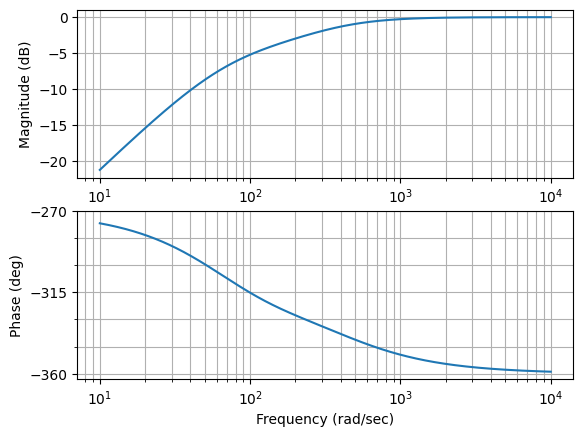

In [60]:
ct.bode(sys)

In [219]:
C16=4.7e-4
C26=4.7e-4
R16=1000
R26=1500
R36=500


ctt2=Circuit("""
Vi 1 0_1 step;down
C1 1 2; right, size=1.5
R1 2 0; down, size=1.5
C2 2 3; right, size=1.5
R3 2 3; right, offset=0.7
R2 3 0_3; down , v=(V_o)
W 0_1 0;right
W 0 0_3;right
"""
)

# Frecuancia de 100 Hz
C19=4.7e-6
C29=4.7e-6
R19=20000
R29=5000
R39=3000

# Frecuencia de 1000 Hz 
C110=4.7e-7
C210=4.7e-7
R110=3300
R210=4800
R310=1700


N6 =  N  # Número de Muestras 
μ  = 0   # Media
sd6 = 0.1   # Standard Deviation
X6 = np.random.normal(μ, sd6, N6) ## FDP GAUSSIANA REAL 


Coeficientes_num7=[C16*C26*R16*R26*R36, C16*R16*R26, 0] #Coeficientes numerador
Coeficientes_dem7=[C16*C26*R16*R26*R36, C16*R16*R26 + C16*R16*R36 + C26*R16*R36 + C26*R26*R36, R16 + R26 + R36]
lti_system7 = lti(Coeficientes_num6, Coeficientes_dem6) 

Coeficientes_num9=[C19*C29*R19*R29*R39, C19*R19*R29, 0] #Coeficientes numerador
Coeficientes_dem9=[C19*C29*R19*R29*R39, C19*R19*R29 + C19*R19*R39 + C29*R19*R39 + C29*R29*R39, R19 + R29 + R39]
lti_system9 = lti(Coeficientes_num9, Coeficientes_dem9) 

Coeficientes_num10=[C110*C210*R110*R210*R310, C110*R110*R210, 0] #Coeficientes numerador
Coeficientes_dem10=[C110*C210*R110*R210*R310, C110*R110*R210 + C110*R110*R310 + C210*R110*R310 + C210*R210*R310, R110 + R210 + R310]
lti_system10 = lti(Coeficientes_num10, Coeficientes_dem10) 

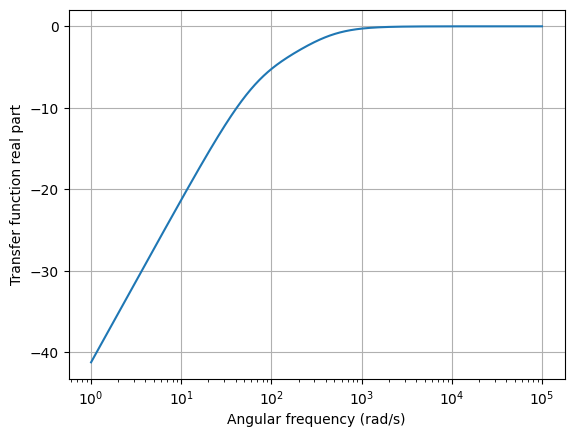

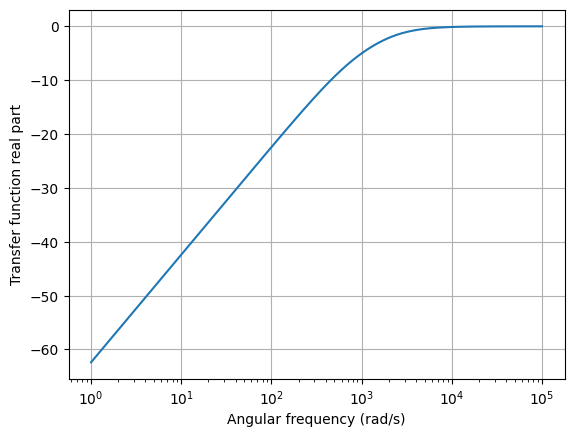

In [220]:
## Moviendo la frecuancia de corte 10 veces hacia alta :funcion tarsnferencia
##GENERAMOS LA FUNCIÓN DE TRANSFERENCIA DEL CIRCUITO TOMANDO LA SALIDA EN R2
H1 = (ctt2.R2.V(s)/ctt2.Vi.V(s)).simplify()
H2 = (ctt2.R2.V(s)/ctt2.Vi.V(s)).simplify()
H3 = (ctt2.R2.V(s)/ctt2.Vi.V(s)).simplify()
H4 = (ctt2.R2.V(s)/ctt2.Vi.V(s)).simplify()

# Funciones de Transferencia
W2=logspace(0,5,2000) ## GENERAMOS VECTOR DE FRECUENCIAS EN ESCALA LOGARITMICA

H_valores1=H1.subs("C1",C1).subs("C2",C2).subs("R1",R1).subs("R2",R2).subs("R3",R3)
X1=H_valores1(j*omega).dB.plot(W2,log_frequency=True) ## GRAFICAMOS SEGUN UN VECTOR DE FRECUENCIAS

H_valores2=H2.subs("C1",C16).subs("C2",C26).subs("R1",R16).subs("R2",R26).subs("R3",R36)
#X2=H_valores2(j*omega).dB.plot(W2,log_frequency=True) ## GRAFICAMOS SEGUN UN VECTOR DE FRECUENCIAS

H_valores3=H3.subs("C1",C19).subs("C2",C29).subs("R1",R19).subs("R2",R29).subs("R3",R39)
#X3=H_valores3(j*omega).dB.plot(W2,log_frequency=True) ## GRAFICAMOS SEGUN UN VECTOR DE FRECUENCIAS

H_valores4=H4.subs("C1",C110).subs("C2",C210).subs("R1",R110).subs("R2",R210).subs("R3",R310)
X4=H_valores4(j*omega).dB.plot(W2,log_frequency=True) ## GRAFICAMOS SEGUN UN VECTOR DE FRECUENCIAS



(-0.00034541907951360796+1.6204812656288824e-20j)


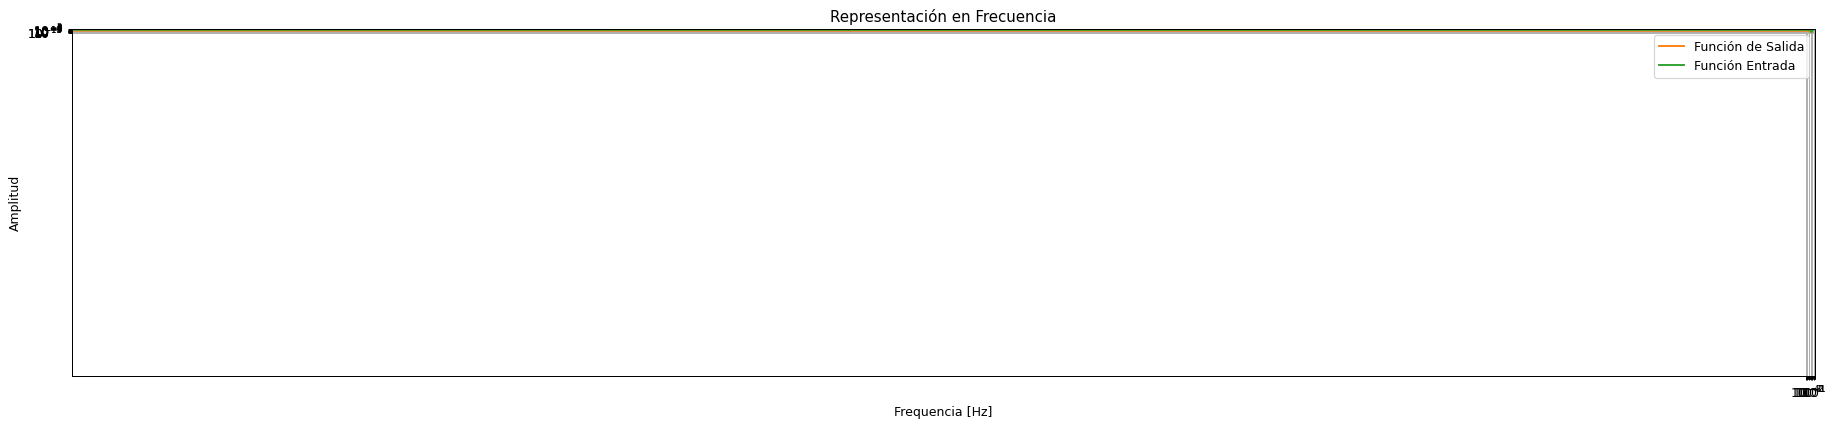

(-0.00034541907951360796+1.6204812656288824e-20j)


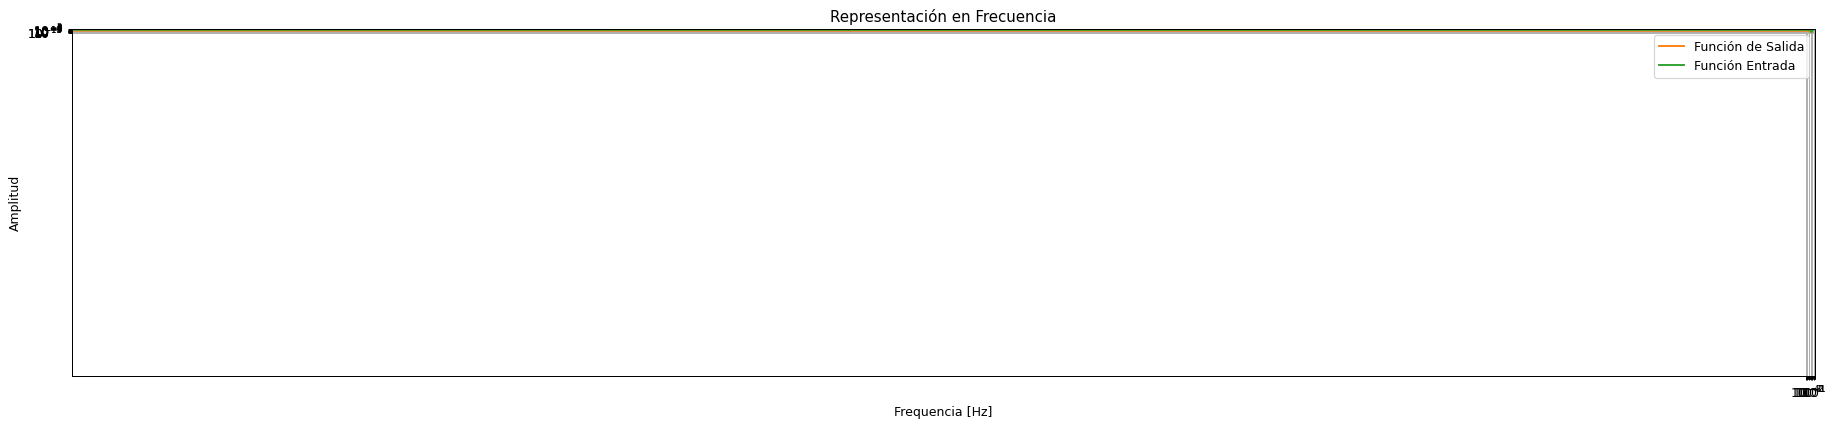

In [209]:
## Moviendo la frecuancia de corte 10 veces hacia alta : Espectro
Autocorrelation_Entrance6 = autocross(X6,X6)

k6,Output_Circuit6,_=lti_system6.output(X6, t)
Autocorrelation_Output6=autocross(Output_Circuit6,Output_Circuit6)

# Espectro Entrada contra salida (naranja)
_ = Ploteo_tiempo_frecuencia2do(t,Autocorrelation_Entrance6, Autocorrelation_Output6,xmax=50,ymax=0.08)

k7,Output_Circuit7,_ = lti_system7.output(X6,t)
Autocorrelation_Output7 = autocross(Output_Circuit7,Output_Circuit7)

_ = Ploteo_tiempo_frecuencia2do(t,Autocorrelation_Entrance6,Autocorrelation_Output7, xmax = 50, ymax=0.08)

## Calibración Bases de Tiempo

In [64]:
d=-1
dB= db2mag(d)
dB

In [65]:
tsin = np.linspace(0,4,N)
valor1 = np.cos(2 * np.pi * 1.5915494309 * tsin)  # Señal sinusoidal de 2 Hz
valor2 = np.cos(2 * np.pi * 15.9154943092 * tsin)  # Señal sinusoidal de 16 Hz
valor3 = np.cos(2 * np.pi * 159.1549430919 * tsin)  # Señal sinusoidal de 160 Hz

In [66]:
k1,Output_Circuit1,_ = lti_system.output(valor1,tsin)
k2,Output_Circuit2,_ = lti_system.output(valor2,tsin)
k3,Output_Circuit3,_ = lti_system.output(valor3,tsin)


findmax10 = Output_Circuit1[1000:]
findmax100 = Output_Circuit2[1000:]
findmax1000 = Output_Circuit3[1000:]

print(findmax10.max())
print(findmax100.max())
print(findmax1000.max())

0.08630946922144964
0.5477633766202145
0.9692292175290362


<function matplotlib.pyplot.show(close=None, block=None)>

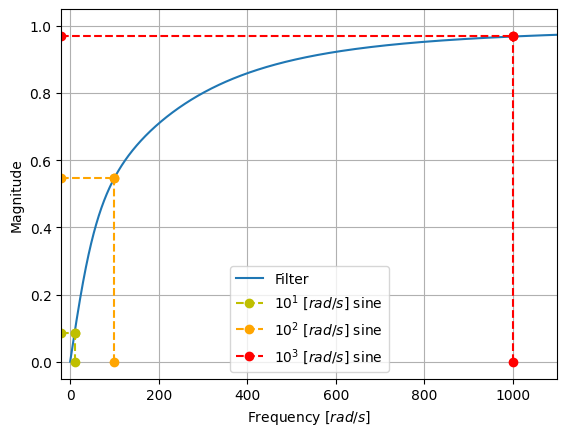

In [67]:
W=logspace(-1,4,2000)
w, mag ,_ = lti_system.bode(w=W)

mag = ct.db2mag(mag)

plt.figure()
plt.grid(True)
plt.xlim((-20,1100))
plt.plot(w,mag, label="Filter")

plt.plot([10, 10], [0, findmax10.max()], 'o--', color='y',label="$10^1$ [$rad/s$] sine")
plt.plot([-20, 10], [findmax10.max(), findmax10.max()], 'o--', color='y')

plt.plot([100, 100], [0, findmax100.max()], 'o--', color='orange',label="$10^2$ [$rad/s$] sine")
plt.plot([-20, 100], [findmax100.max(), findmax100.max()], 'o--', color='orange')

plt.plot([1000, 1000], [0, findmax1000.max()], 'o--', color='r',label="$10^3$ [$rad/s$] sine")
plt.plot([-20, 1000], [findmax1000.max(), findmax1000.max()], 'o--', color='r')

plt.xlabel("Frequency [$rad/s$]")
plt.ylabel("Magnitude")
plt.legend()
plt.show

# Generación Señal de Entrada

In [68]:
# Señal exponencial
# N =  4096 # // numero de muestras 

#   #   parameter vector \theta=\lambda - Mean = 1/(\lambda)
# parameter = 4.7  
# mean  = 1/parameter
# X = np.random.exponential(mean, N) ## FDP Exponencial real  

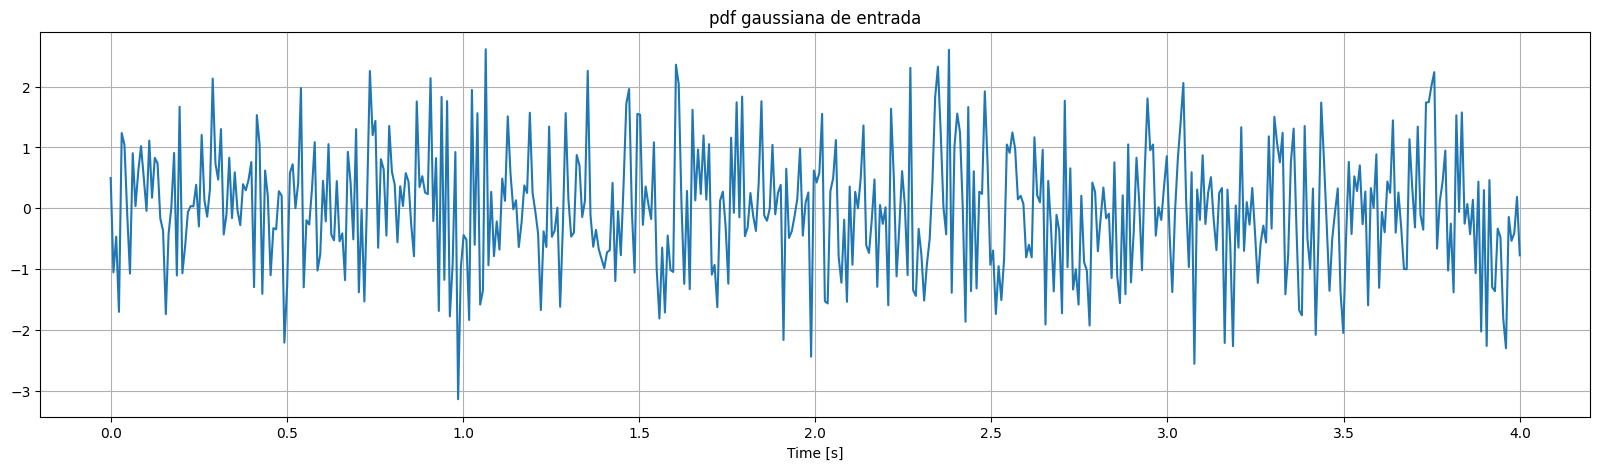

<Figure size 2000x500 with 0 Axes>

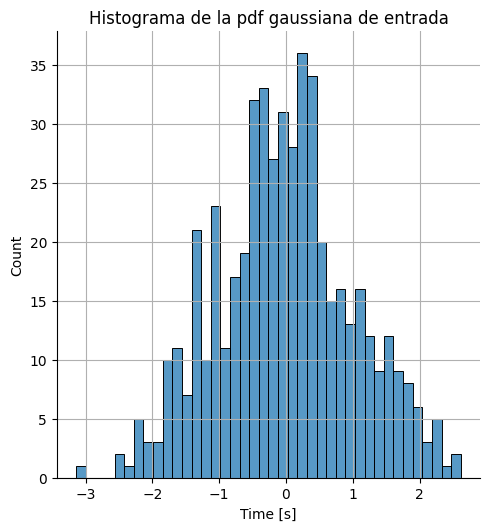

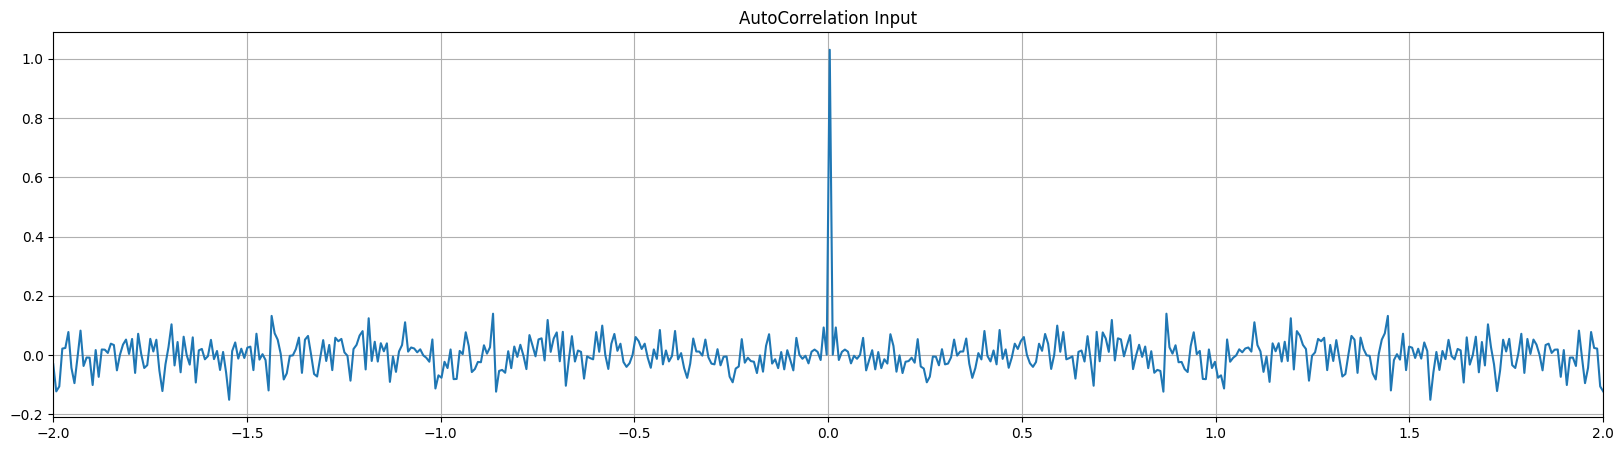

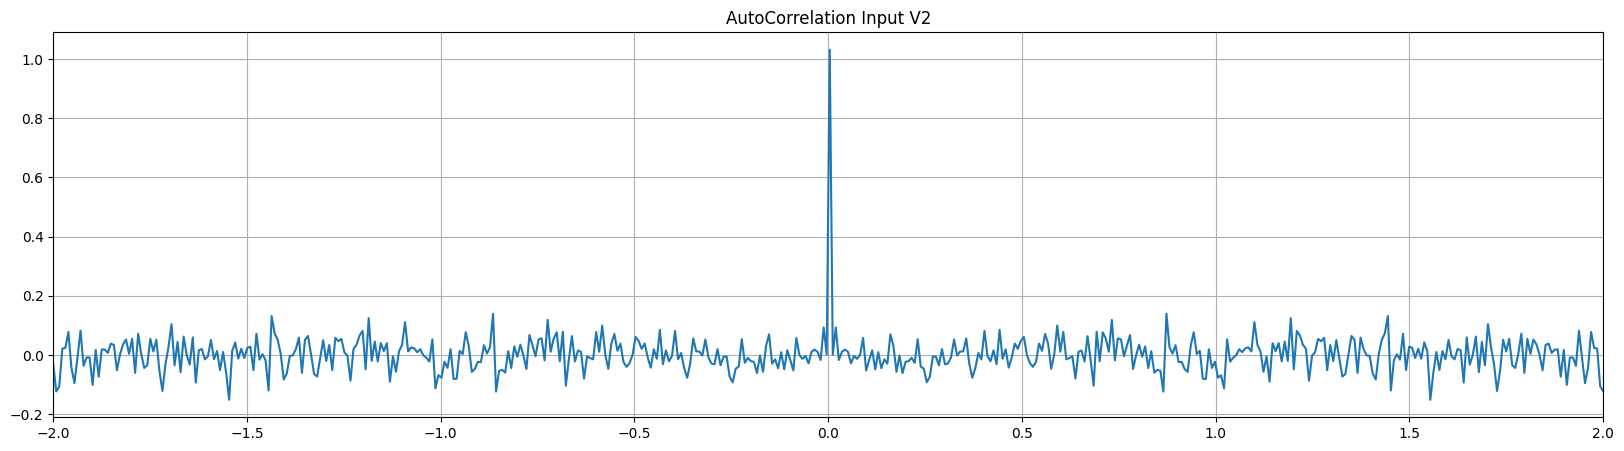

In [69]:
# Generamos la pdf a la entrada

N =  512  # Número de Muestras 
μ  = 0   # Media
sd = 1   # Standard Deviation
X = np.random.normal(μ, sd, N) ## FDP GAUSSIANA REAL  


Autocorrelation_Entrance = autocross(X,X)
corre= autocross2(X,X)

t = np.linspace(0,4,N)  

# Graficamos la pdf de entrada
plt.figure(figsize=(20,5))
plt.plot(t,X)
plt.title("pdf gaussiana de entrada")
plt.xlabel('Time [s]')
plt.grid()

#Histograma de la pdf de entrada:
plt.figure(figsize=(20,5))
sns.displot(X,bins=40)
hist_kws={"edgecolor":"balck"}
plt.title("Histograma de la pdf gaussiana de entrada")
plt.xlabel("Time [s]")
plt.grid()

# Graficamos la autocorrelación de la pdf
p=np.linspace(0,4,4087)
plt.figure(figsize=(20,5))
# window_size = 1  # Tamaño de la ventana
# filtered_correlation = np.convolve(Autocorrelation_Entrance, np.ones(window_size) / window_size, mode='valid')
plt.plot(t-2,Autocorrelation_Entrance)
plt.xlim(-2,2)
hist_kws={"edgecolor":"black"}
plt.title("AutoCorrelation Input")
plt.grid()
plt.show()

plt.figure(figsize=(20,5))
plt.plot(t-2,corre)
plt.xlim(-2,2)
hist_kws={"edgecolor":"black"}
plt.title("AutoCorrelation Input V2")
plt.grid()
plt.show()



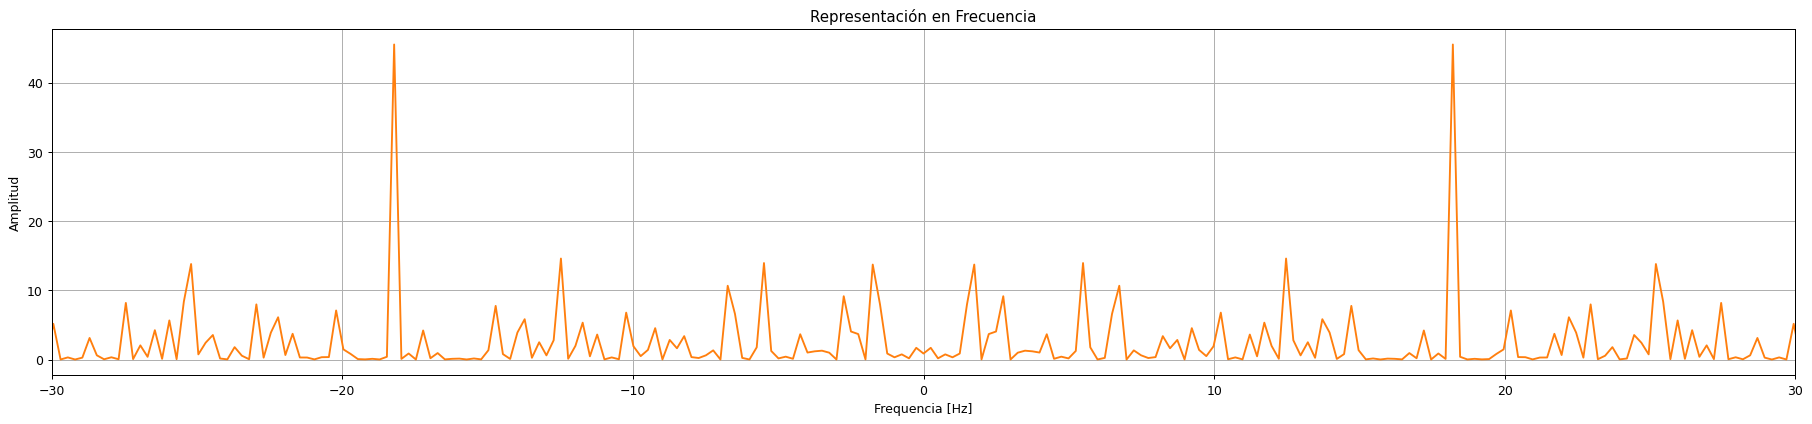

In [70]:
#### Graficamos el espectro de densidad de frecuencia
#_ = Ploteo_tiempo_frecuencia2promedio(t,μ,sd,xmax=30,ymax=0.1)
_ = Ploteo_tiempo_frecuencia2(t,Autocorrelation_Entrance,xmax=30,ymax=None)

La función de correlación se define como

$$ R_x(\tau) = \lim_{x\to\infty} \frac{1}{T} ∫_T x(t)x^*(t + τ)dt $$

Para un Ruido Blanco Gaussiano

$$ ∫_{-∞}^{+∞}  f(x)e^{-j2πft}dt$$

$$ R_{η}(τ) = ∫_{-∞}^{+∞}  \frac{N_0}{2} e^{-j2πft}dt $$

$$ R_{η}(τ) = \frac{N_0}{2}δ(τ) $$

El espectro de potencia es

$$ S_{\eta} = f [ R_{\eta}(\tau)] $$

$$ S_{\eta} = f[\frac{N_0}{2}δ(τ)] = \frac{N_0}{2}$$

# Señal Sinusoidal

(-0.06037712511716458+7.123332833773501e-19j)


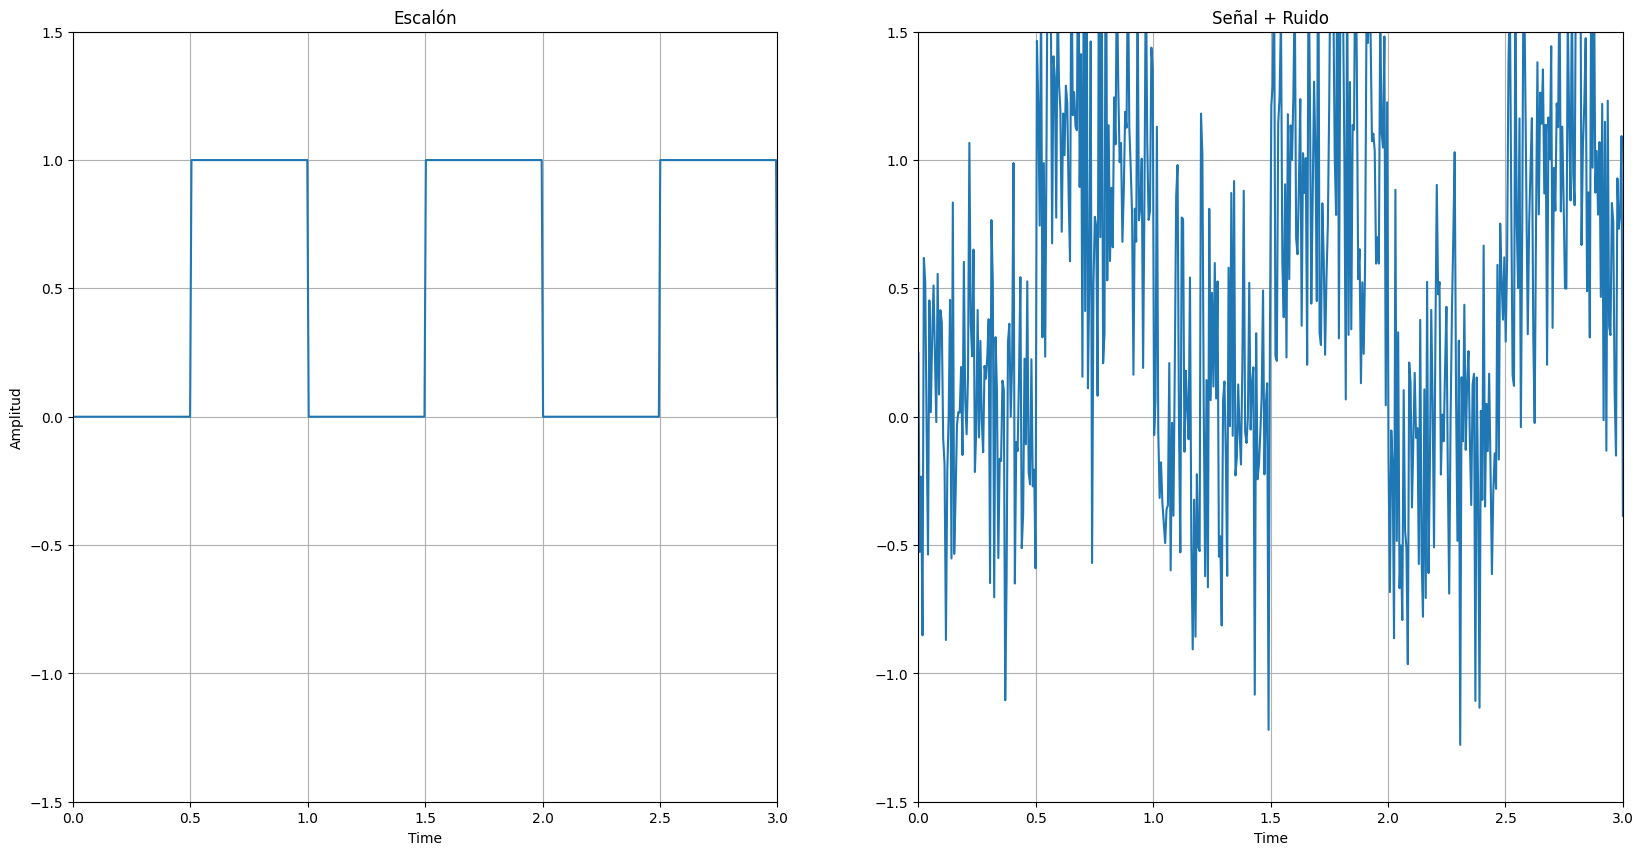

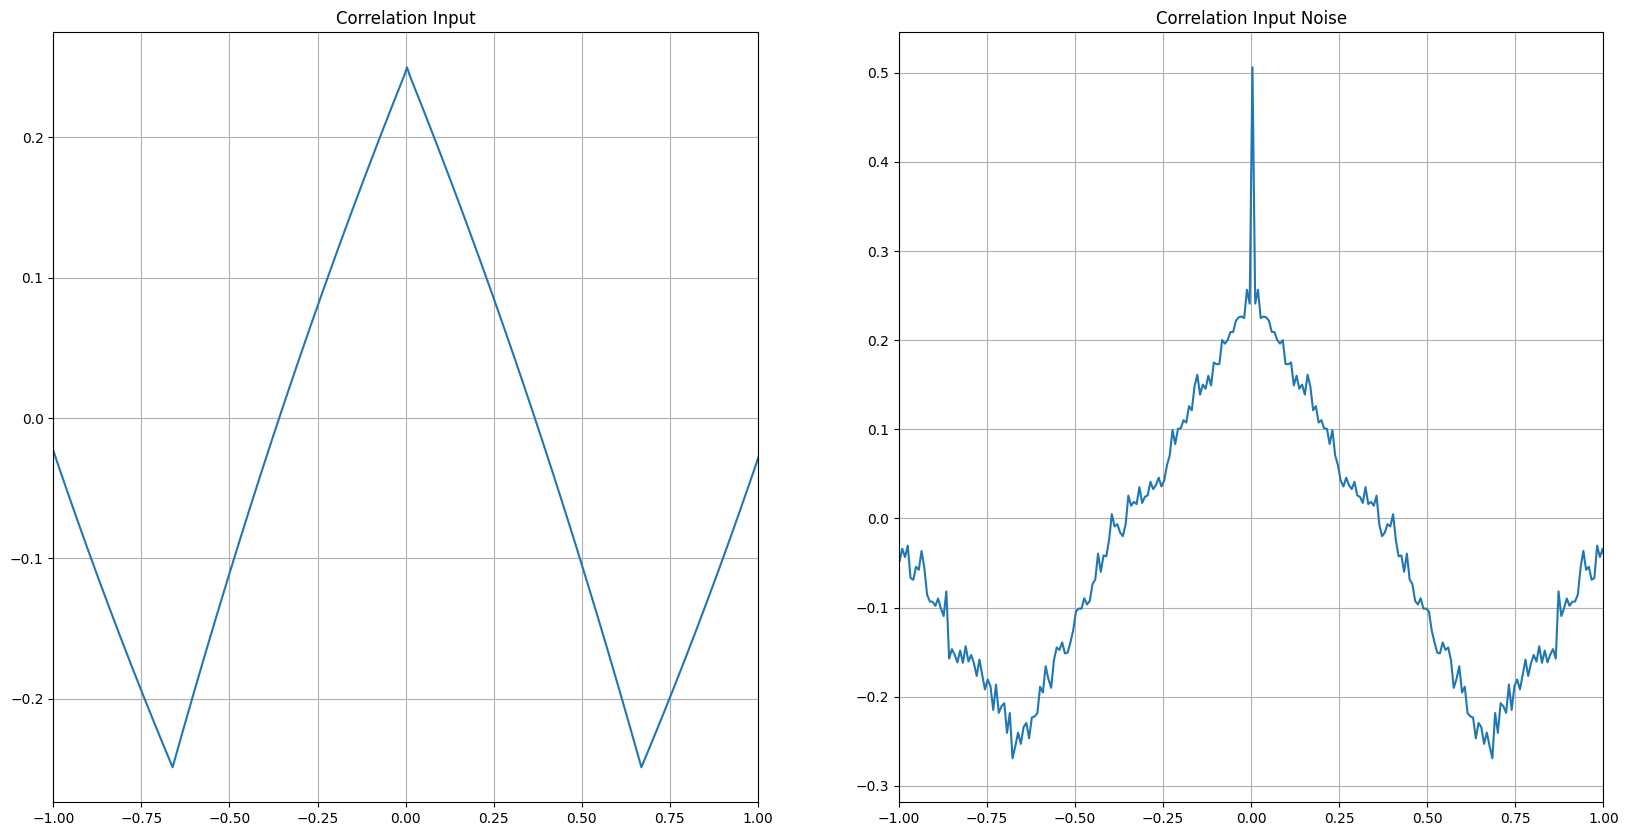

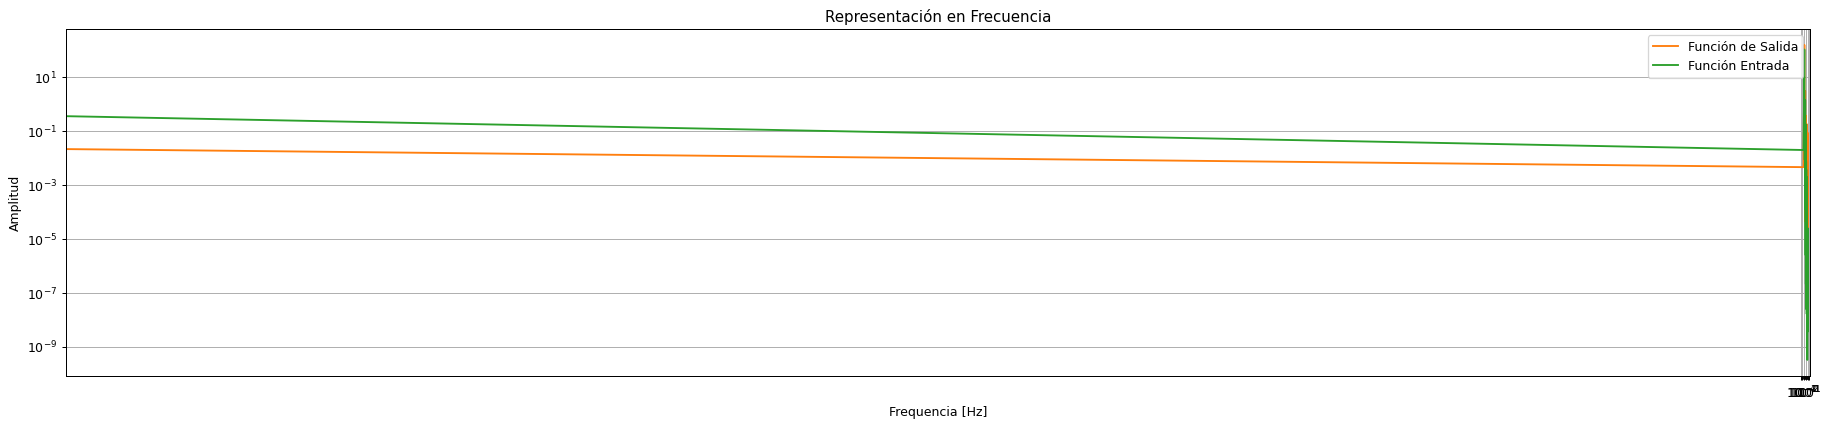

In [146]:
# Generamos la señal rectangular

# Definir el instante de tiempo en el que ocurre el escalón
t_step = np.linspace(0, 3, N)  # Array de tiempo

db = 0
gain = ct.db2mag(db)
# Periodo de la señal escalón
T = 1

f = 200

# Generar la señal escalón periódica
step_signal = gain * np.heaviside((t_step % T) - T/2, 1)

sine_signal = np.cos(2 * np.pi * f * t_step)  # Señal sinusoidal de 16 Hz

noise_sine = step_signal + (X*0.5)

Autocorrelation_step = autocross(step_signal,step_signal)
Autocorrelation_noise_step = autocross(noise_sine,noise_sine)


# Comparamos señal original y señal con ruido

xmax = 3
#ymax = 1.1

fig, axs = plt.subplots(1, 2,figsize=(20,10))
axs[0].plot(t_step, step_signal)
axs[0].set_title("Escalón")
axs[0].set_xlabel("Time")
axs[0].set_ylabel('Amplitud')
axs[0].set_ylim(-1.5,1.5)
axs[0].set_xlim(0,xmax)
axs[0].grid(True)
axs[1].plot(t_step, noise_sine)
axs[1].set_title("Señal + Ruido")
axs[1].set_xlabel("Time")
axs[1].set_xlim(0,xmax)
axs[1].set_ylim(-1.5,1.5)
axs[1].grid(True)


fig, axs = plt.subplots(1, 2,figsize=(20,10))
axs[0].plot(t-2,Autocorrelation_step)
axs[0].set_title("Correlation Input")
axs[0].grid(True)
axs[0].set_xlim(-1,1)
#axs[0].set_ylim(-0.25,1.5)
axs[1].plot(t-2, Autocorrelation_noise_step)
axs[1].set_title("Correlation Input Noise")
axs[1].grid(True)
axs[1].set_xlim(-1,1)
#axs[1].set_ylim(-0.25,1.5)


_ = Ploteo_tiempo_frecuencia2do(t, Autocorrelation_step, Autocorrelation_noise_step, xmax=15, ymax=None)

# Salida del circuito con señal rectangular

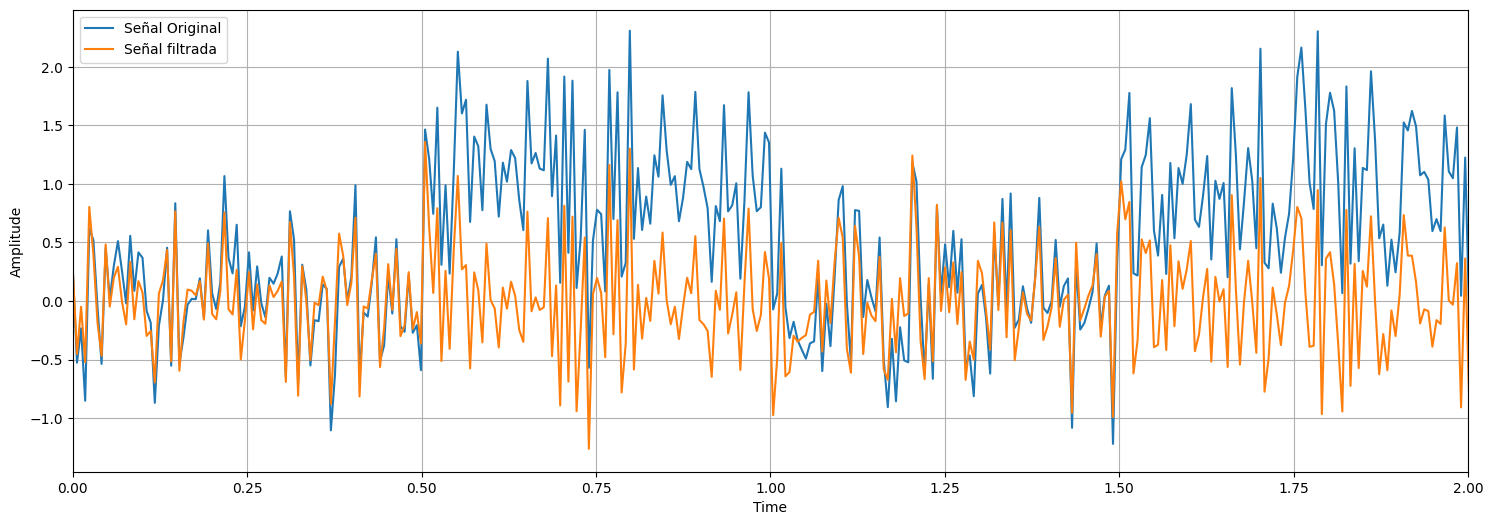

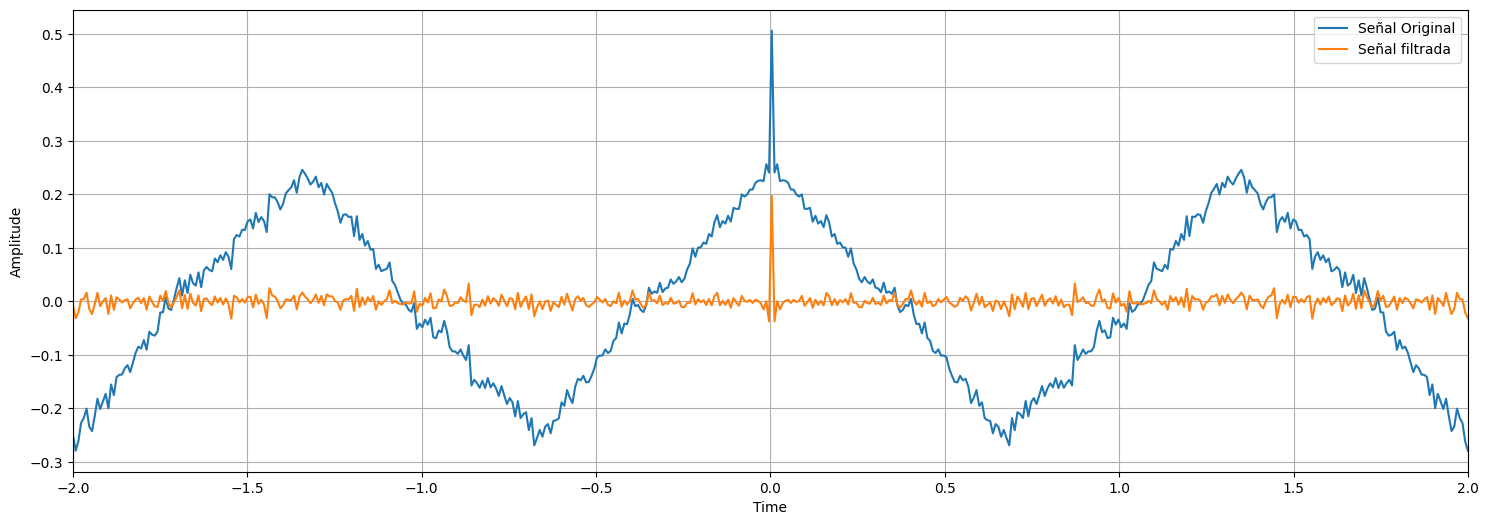

(-0.0063587597779865826+2.0796200725051508e-19j)


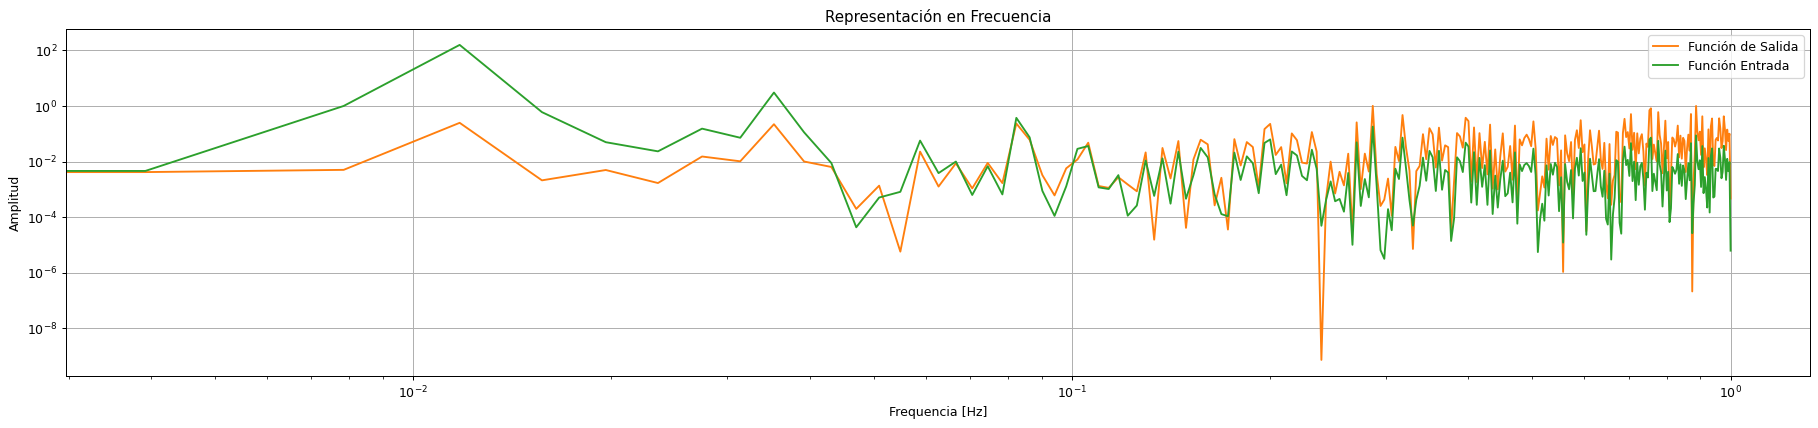

In [149]:
###SEÑAL CON RUIDO


k_step,Output_Circuit_step_noise,_=lti_system9.output(noise_sine, t_step) ##SALIDA DEL CIRCUITO.

Autocorrelation_Output_step_noise=autocross(Output_Circuit_step_noise,Output_Circuit_step_noise) 

xmax = 3
#ymax = 1.1


# COMPARAMOS ENTRADA VS SALIDA 
# fig, axs = plt.subplots(1, 2,figsize=(20,10))
# axs[0].plot(t_step, step_signal)
# axs[0].set_title("INPUT")
# axs[0].set_xlabel("Time")
# axs[0].set_xlim(0,xmax)
# #axs[0].set_ylim(-0.6,0.6)
# axs[0].grid(True)
# axs[1].plot(k_step, Output_Circuit_step)
# axs[1].set_title("OUTPUT")
# axs[1].set_xlabel("Time")
# axs[1].set_xlim(0,xmax)
# #axs[1].set_ylim(-0.6,0.6)
# axs[1].grid(True)

plt.figure(figsize=(18,6))
plt.plot(t_step,noise_sine,label='Señal Original')
plt.plot(k_step, Output_Circuit_step_noise, label='Señal filtrada')
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim(0,2)
plt.legend()
plt.show()



plt.figure(figsize=(18,6))
plt.plot(t-2,Autocorrelation_noise_step,label='Señal Original')
plt.plot(t-2, Autocorrelation_Output_step_noise, label='Señal filtrada')
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim(-2,2)
plt.legend()
plt.show()

xmax =2
#ymax = 1.1

# fig, axs = plt.subplots(1, 2,figsize=(20,10))
# axs[0].plot(t-2,Autocorrelation_noise_step)
# axs[0].set_title("Correlation Input")
# axs[0].set_xlim(-xmax,xmax)
# #axs[0].set_ylim(-0.4,0.4)
# axs[0].grid(True)
# axs[1].plot(t-2, Autocorrelation_Output_step)
# axs[1].set_title("Correlation Output")
# axs[1].set_xlim(-xmax,xmax)
# axs[1].grid(True)
# #axs[1].set_ylim(-0.4,0.4)



_ = Ploteo_tiempo_frecuencia2do(t,Autocorrelation_noise_step,Autocorrelation_Output_step_noise,xmax=None,ymax=None)
#_ = Ploteo_tiempo_frecuencia2(t,Autocorrelation_Output_step,xmax=None,ymax=None)

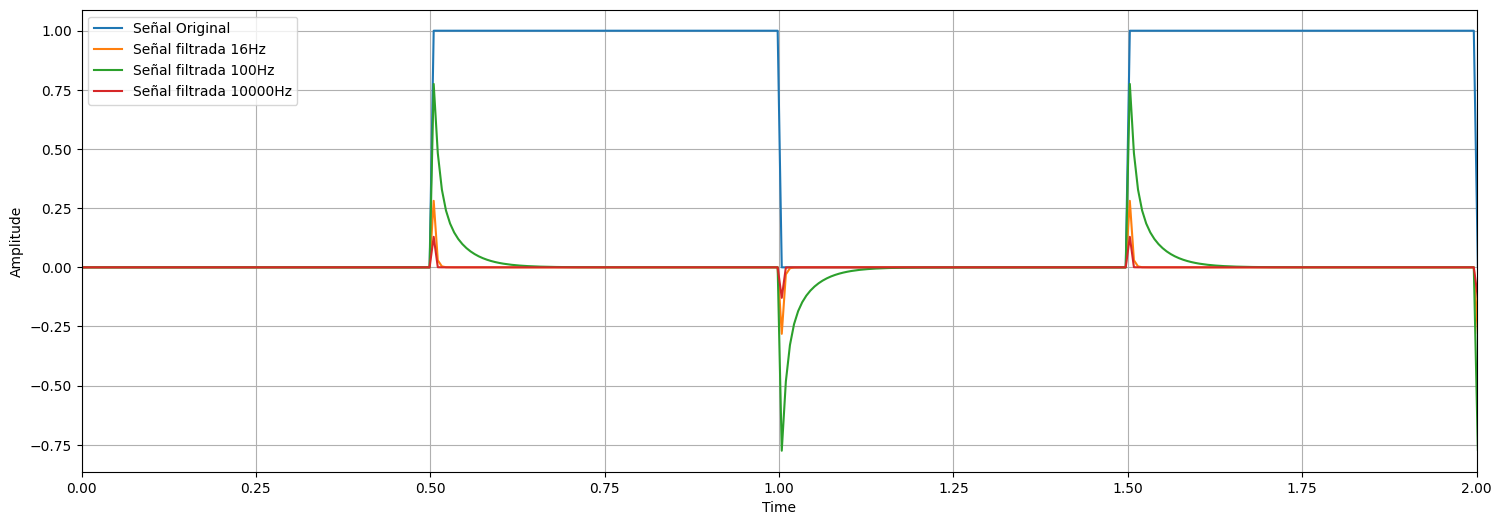

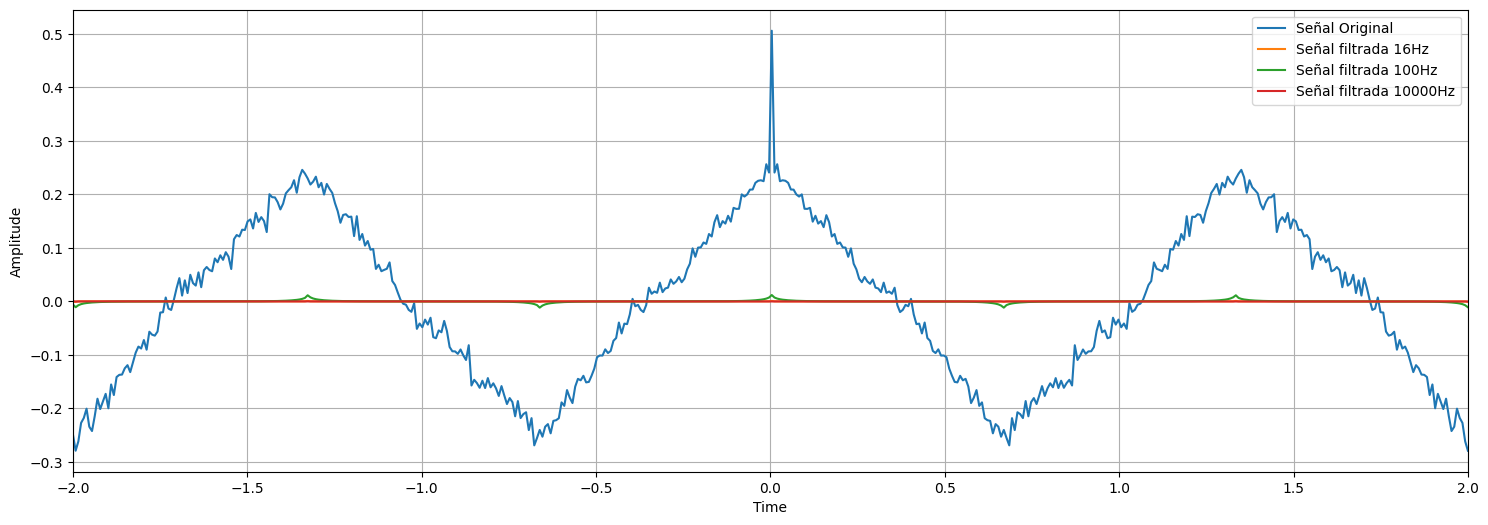

(-0.012099591284744658+0j)


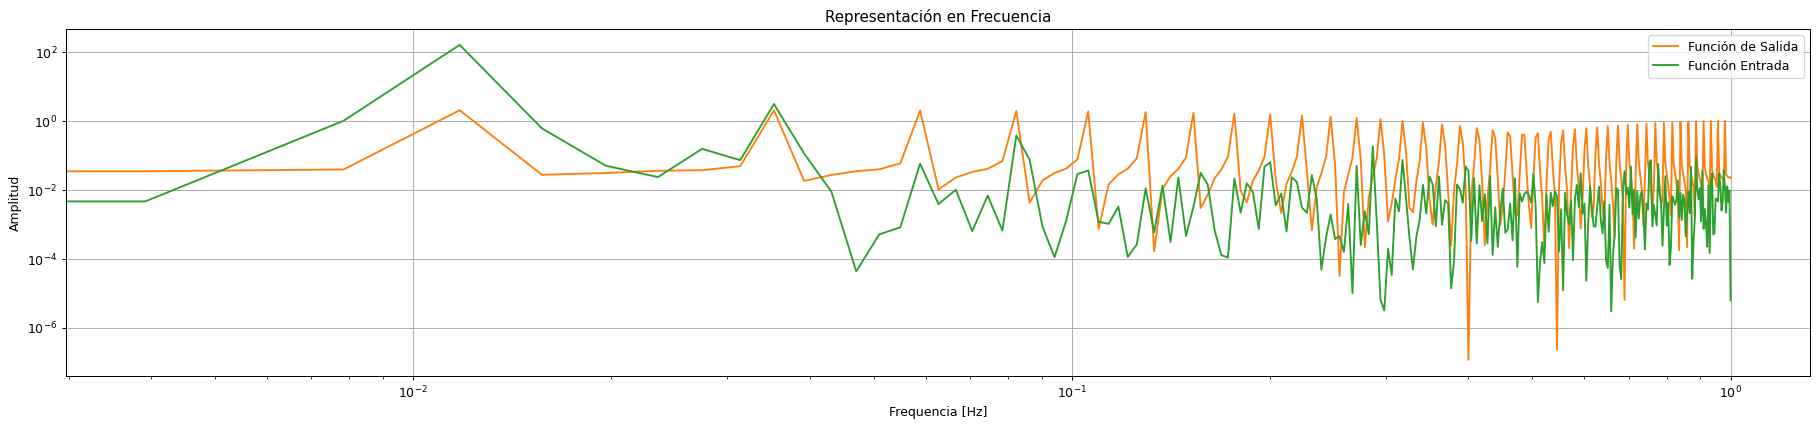

In [221]:
k_step,Output_Circuit_step,_=lti_system7.output(step_signal, t_step) ##SALIDA DEL CIRCUITO.
Autocorrelation_Output_step=autocross(Output_Circuit_step,Output_Circuit_step) 


k_step2,Output_Circuit_step2,_=lti_system9.output(step_signal, t_step) ##SALIDA DEL CIRCUITO.
Autocorrelation_Output_step2=autocross(Output_Circuit_step2,Output_Circuit_step2) 

k_step3,Output_Circuit_step3,_=lti_system10.output(step_signal, t_step) ##SALIDA DEL CIRCUITO.
Autocorrelation_Output_step3=autocross(Output_Circuit_step3,Output_Circuit_step3) 



# COMPARAMOS ENTRADA VS SALIDA 
# fig, axs = plt.subplots(1, 2,figsize=(20,10))
# axs[0].plot(t_step, step_signal)
# axs[0].set_title("INPUT")
# axs[0].set_xlabel("Time")
# axs[0].set_xlim(0,xmax)
# #axs[0].set_ylim(-0.6,0.6)
# axs[0].grid(True)
# axs[1].plot(k_step, Output_Circuit_step)
# axs[1].set_title("OUTPUT")
# axs[1].set_xlabel("Time")
# axs[1].set_xlim(0,xmax)
# #axs[1].set_ylim(-0.6,0.6)
# axs[1].grid(True)

plt.figure(figsize=(18,6))
plt.plot(t_step,step_signal,label='Señal Original')
plt.plot(k_step, Output_Circuit_step, label='Señal filtrada 16Hz')
plt.plot(k_step2, Output_Circuit_step2, label='Señal filtrada 100Hz')
plt.plot(k_step3, Output_Circuit_step3, label='Señal filtrada 10000Hz')
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim(0,2)
plt.legend()
plt.show()



plt.figure(figsize=(18,6))
plt.plot(t-2,Autocorrelation_noise_step,label='Señal Original')
plt.plot(t-2, Autocorrelation_Output_step, label='Señal filtrada 16Hz')
plt.plot(t-2, Autocorrelation_Output_step2, label='Señal filtrada 100Hz')
plt.plot(t-2, Autocorrelation_Output_step3, label='Señal filtrada 10000Hz')
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim(-2,2)
plt.legend()
plt.show()


# fig, axs = plt.subplots(1, 2,figsize=(20,10))
# axs[0].plot(t-2,Autocorrelation_noise_step)
# axs[0].set_title("Correlation Input")
# axs[0].set_xlim(-xmax,xmax)
# #axs[0].set_ylim(-0.4,0.4)
# axs[0].grid(True)
# axs[1].plot(t-2, Autocorrelation_Output_step)
# axs[1].set_title("Correlation Output")
# axs[1].set_xlim(-xmax,xmax)
# axs[1].grid(True)
# #axs[1].set_ylim(-0.4,0.4)



_ = Ploteo_tiempo_frecuencia2do(t,Autocorrelation_noise_step,Autocorrelation_Output_step,xmax=None,ymax=None)

#_ = Ploteo_tiempo_frecuencia2(t,Autocorrelation_Output_step,xmax=None,ymax=None)

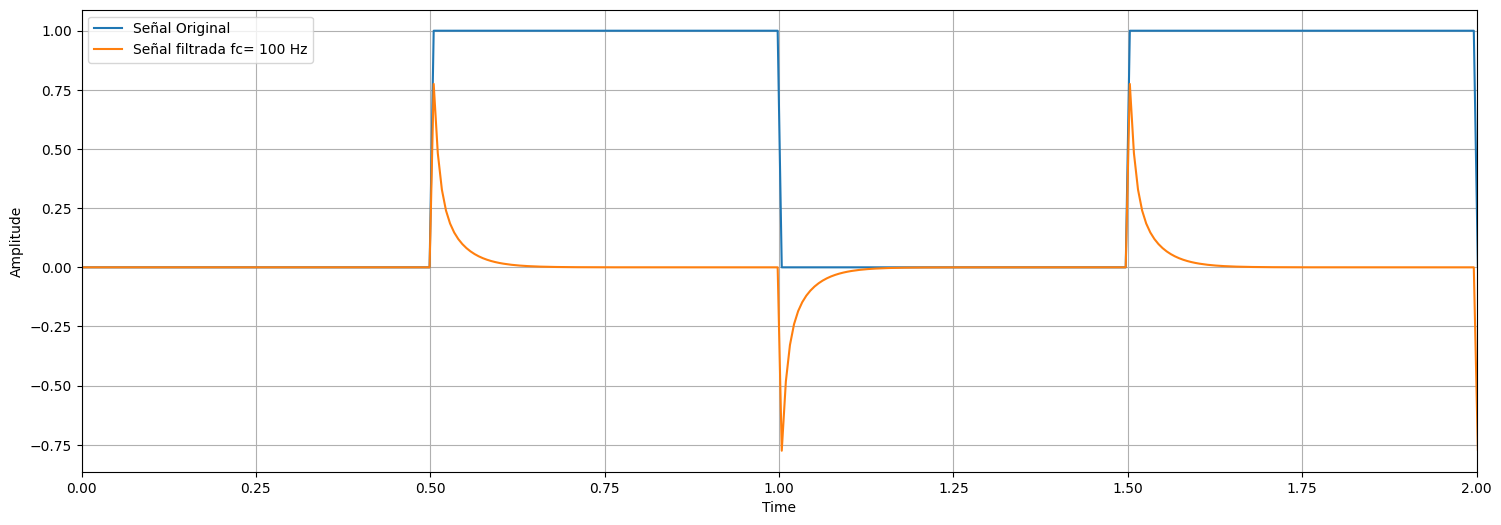

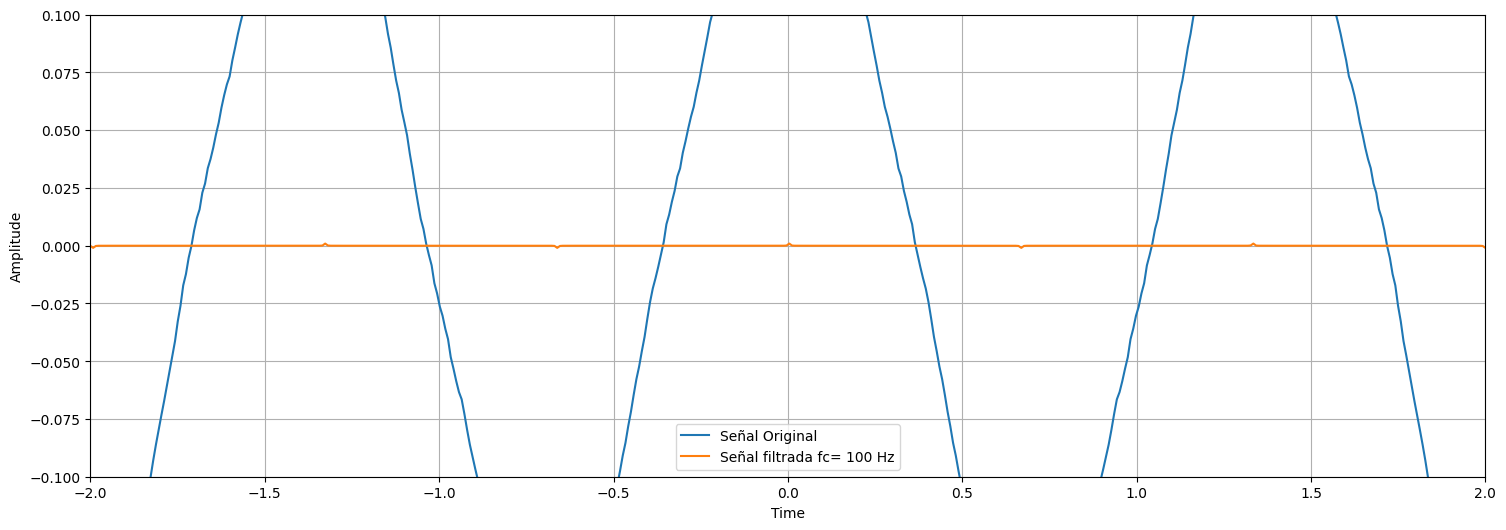

In [134]:
k_step,Output_Circuit_step2,_=lti_system9.output(step_signal, t_step) ##SALIDA DEL CIRCUITO.

Autocorrelation_Output_step2=autocross(Output_Circuit_step2,Output_Circuit_step2) 



plt.figure(figsize=(18,6))
plt.plot(t_step,step_signal,label='Señal Original')
plt.plot(k_step, Output_Circuit_step2, label='Señal filtrada fc= 100 Hz')
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim(0,2)
plt.legend()
plt.show()



plt.figure(figsize=(18,6))
plt.plot(t-2,Autocorrelation_noise_step,label='Señal Original')
plt.plot(t-2, Autocorrelation_Output_step, label='Señal filtrada fc= 100 Hz')
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim(-2,2)
plt.ylim(-0.1,0.1)
plt.legend()
plt.show()


# Entrenamiento Red Neuronal

In [175]:
# Dividimos en datos de entrenamiento, prueba y validación
# Partición 75% entrenamiento - 25% prueba
X_train, X_test, y_train, y_test = train_test_split(noise_sine, Output_Circuit_step_noise) 
print(X_train.shape)
print(X_test.shape)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)
print(X_train.shape)
print(X_val.shape)


# Normalizamos los datos
mean=X_train.mean(axis=0)
std=X_train.std(axis=0)
X_train=(X_train-mean)/std

X_test=(X_test-mean)/std

X_val=(X_val-mean)/std

### LO GENERAMOS COMO UN TENSOR PARA QUE SEA MAS FACIL RECONOCERLO.
X_train=X_train.reshape(len(X_train),1) 
X_test=X_test.reshape(len(X_test),1)
X_val=X_val.reshape(len(X_val),1)

y_train=y_train.reshape(len(y_train),1)
y_test=y_test.reshape(len(y_test),1)
y_val=y_val.reshape(len(y_val),1)

print(X_train.shape)
print(y_train.shape)

(384,)
(128,)
(288,)
(96,)
(288, 1)
(288, 1)


In [212]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf

###### GENERAMOS EL MODELO
modelo=models.Sequential()
#### CARGAMOS LAS CAPAS
modelo.add(Dense(20,activation="relu",input_shape=(1,1))) ## SIEMPRE MIRAR LA SEGUNDA DIMENSION
modelo.add(Dropout(0.5))
modelo.add(Dense(20,activation="relu",kernel_regularizer=regularizers.L1L2(0.001))) # ElasticNet
modelo.add(Dense(20,activation="relu",kernel_regularizer=regularizers.l1(0.001))) # Lasso
modelo.add(Dense(20,activation="relu",kernel_regularizer=regularizers.l2(0.001))) # Ridge
modelo.add(Dense(1)) ## COMO ES LINEAL LA SALIDA NO NECESITO PONERLE UNA CAPA DE ACTIVACIÓN

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

modelo.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),loss="mae",)


history=modelo.fit(X_train,
         y_train,
         batch_size=16,
         validation_data=(X_val,y_val),
         callbacks=[early],
         epochs=50)


Epoch 1/50
18/18 [==============================] - 1s 12ms/step - loss: 0.5071 - val_loss: 0.4376
Epoch 2/50
18/18 [==============================] - 0s 5ms/step - loss: 0.4716 - val_loss: 0.4095
Epoch 3/50
18/18 [==============================] - 0s 4ms/step - loss: 0.4591 - val_loss: 0.3980
Epoch 4/50
18/18 [==============================] - 0s 4ms/step - loss: 0.4489 - val_loss: 0.3888
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 0.4405 - val_loss: 0.3794
Epoch 6/50
18/18 [==============================] - 0s 4ms/step - loss: 0.4355 - val_loss: 0.3752
Epoch 7/50
18/18 [==============================] - 0s 4ms/step - loss: 0.4277 - val_loss: 0.3696
Epoch 8/50
18/18 [==============================] - 0s 5ms/step - loss: 0.4236 - val_loss: 0.3647
Epoch 9/50
18/18 [==============================] - 0s 5ms/step - loss: 0.4196 - val_loss: 0.3594
Epoch 10/50
18/18 [==============================] - 0s 3ms/step - loss: 0.4140 - val_loss: 0.3578
Epoch 11/50
18/18 

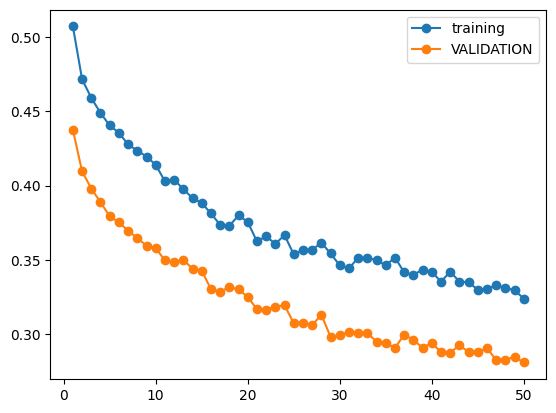

4/4 [==============================] - 0s 2ms/step


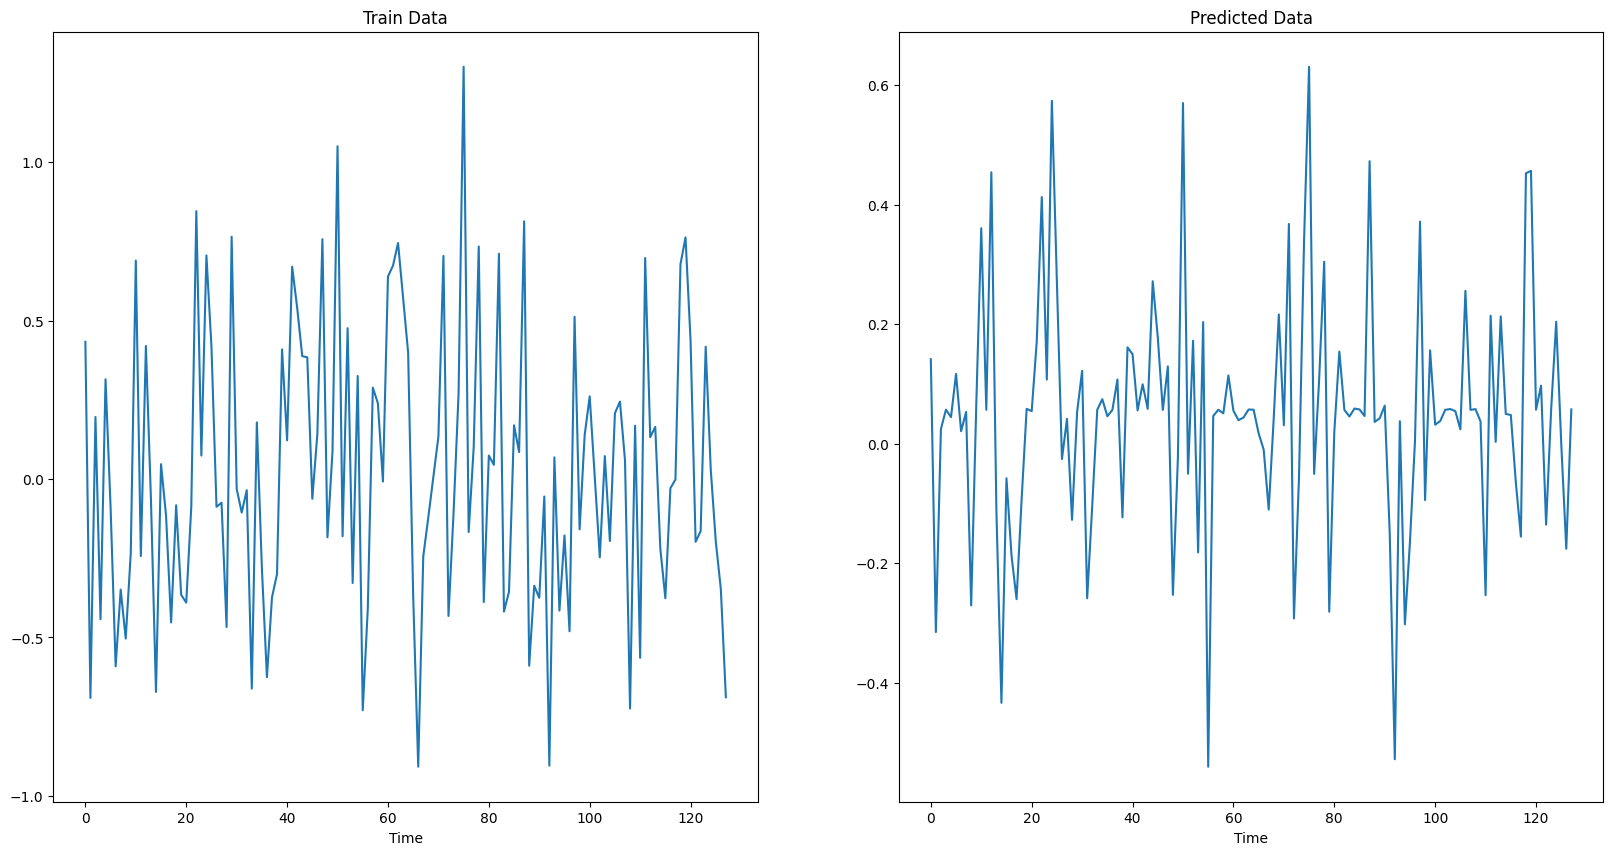

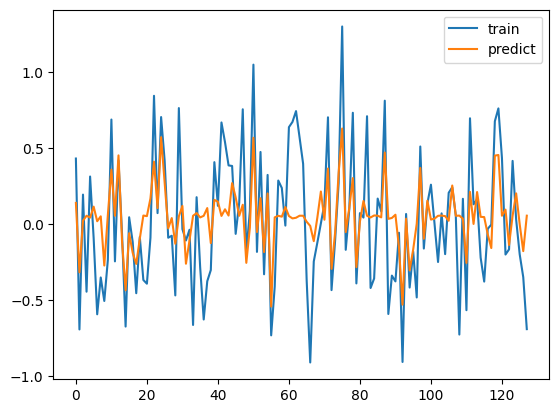

4/4 [==============================] - 0s 2ms/step - loss: 0.3170


In [215]:
history_dict=history.history
loss_values=history_dict["loss"]
val_loss_values=history_dict["val_loss"]
epoch=range(1,len(loss_values)+1)

plt.plot(epoch,loss_values,"o-",label="training")
plt.plot(epoch,val_loss_values,"o-",label="VALIDATION")
plt.legend()
plt.show()


y_predict = np.array(modelo.predict(X_test))
y_predict = y_predict.reshape(X_test.shape[0],1)


fig, axs = plt.subplots(1, 2,figsize=(20,10))
axs[0].plot(y_test)
axs[0].set_title("Train Data")
axs[0].set_xlabel("Time")
axs[1].plot(y_predict)
axs[1].set_title("Predicted Data")
axs[1].set_xlabel("Time")


plt.figure()
plt.plot(y_test,label='train')
plt.plot(y_predict,label='predict')
plt.legend()
plt.show()

modelo.evaluate(X_test, y_test)


len(Output_Circuit_step)

len(y_train)

i = 0
list = []
#while (i<2304):
    #l2 = Output_Circuit_step[i]-y_train[i]
    #list.append(l2)
    #i = i+1

#L2 = ((sum(list))**2)/2812
#print(list)
#print("Error L2:",L2)

In [76]:
y_predict.shape

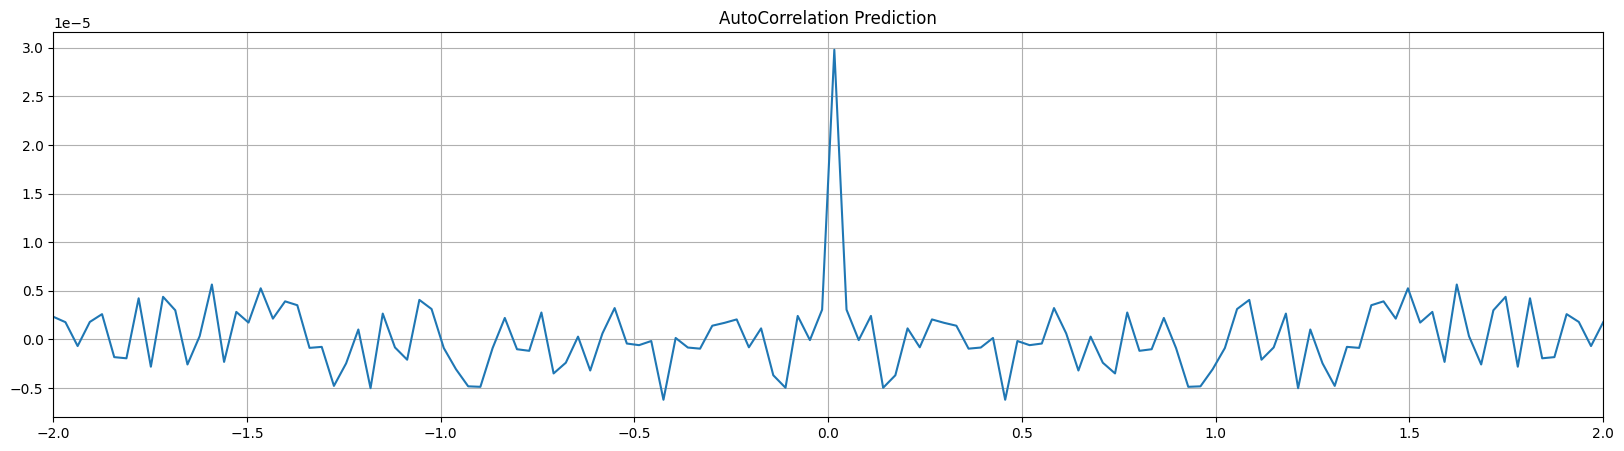

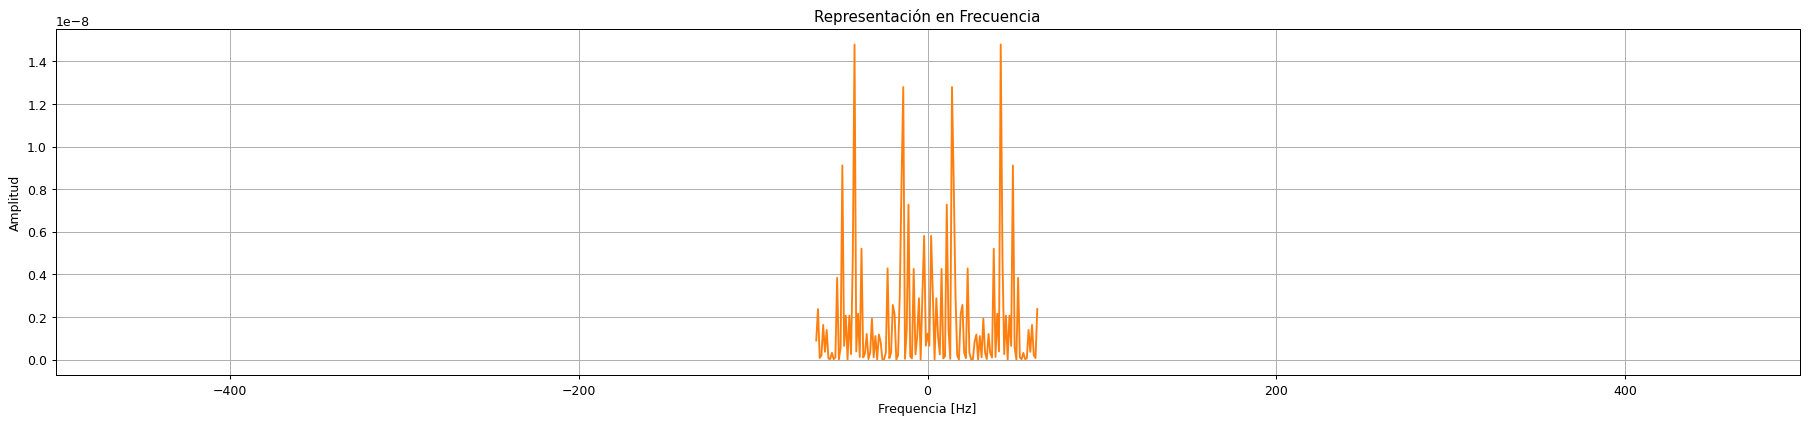

In [77]:
y_predict = np.squeeze(y_predict)
t_predict = np.linspace(0,4,y_predict.shape[0])
Autocorrelation_Prediction = autocross(y_predict,y_predict)

plt.figure(figsize=(20,5))
plt.plot(t_predict-2,Autocorrelation_Prediction)
plt.xlim(-2,2)
hist_kws={"edgecolor":"black"}
plt.title("AutoCorrelation Prediction")
plt.grid()
plt.show()

_ = Ploteo_tiempo_frecuencia2(t_predict,Autocorrelation_Prediction,xmax=500,ymax=None)

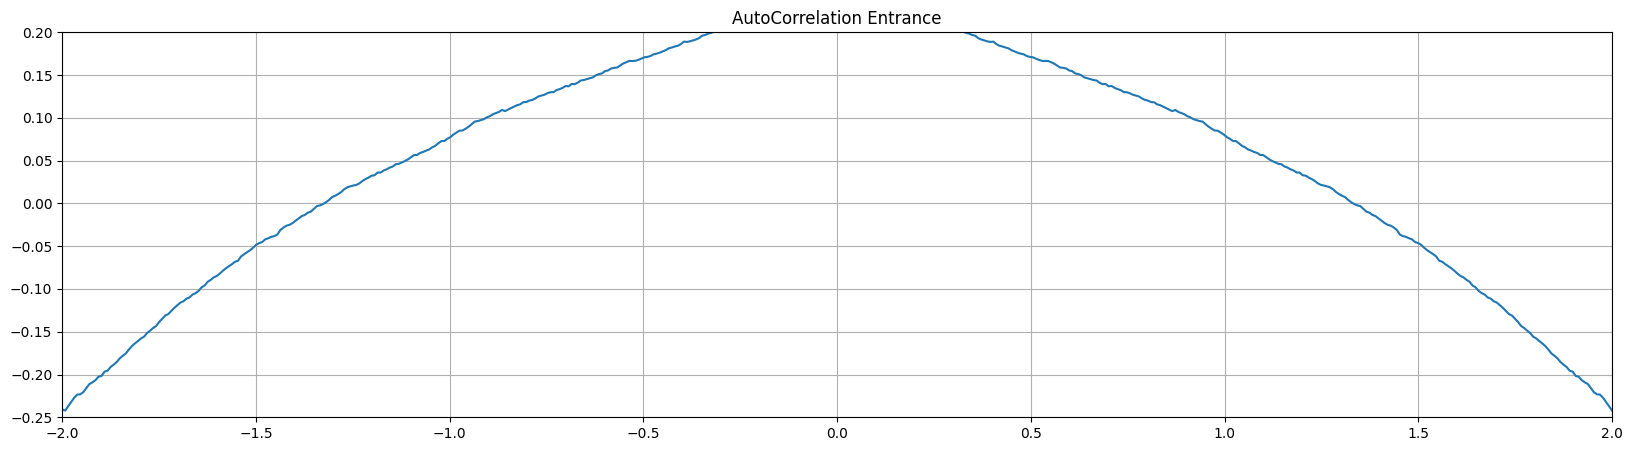

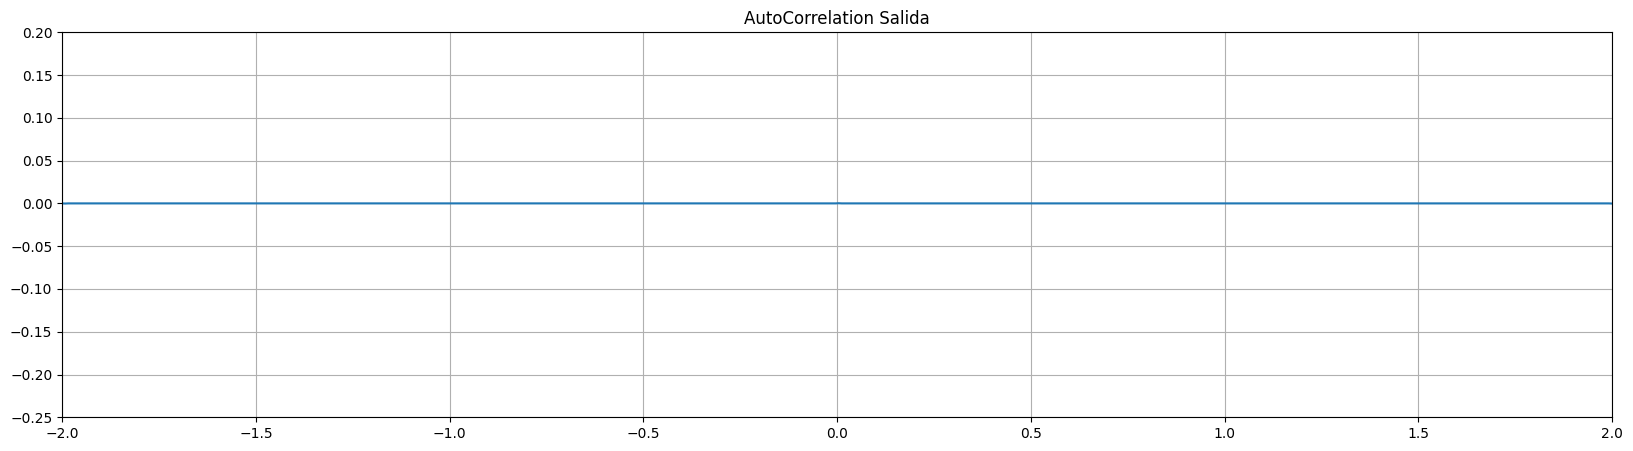

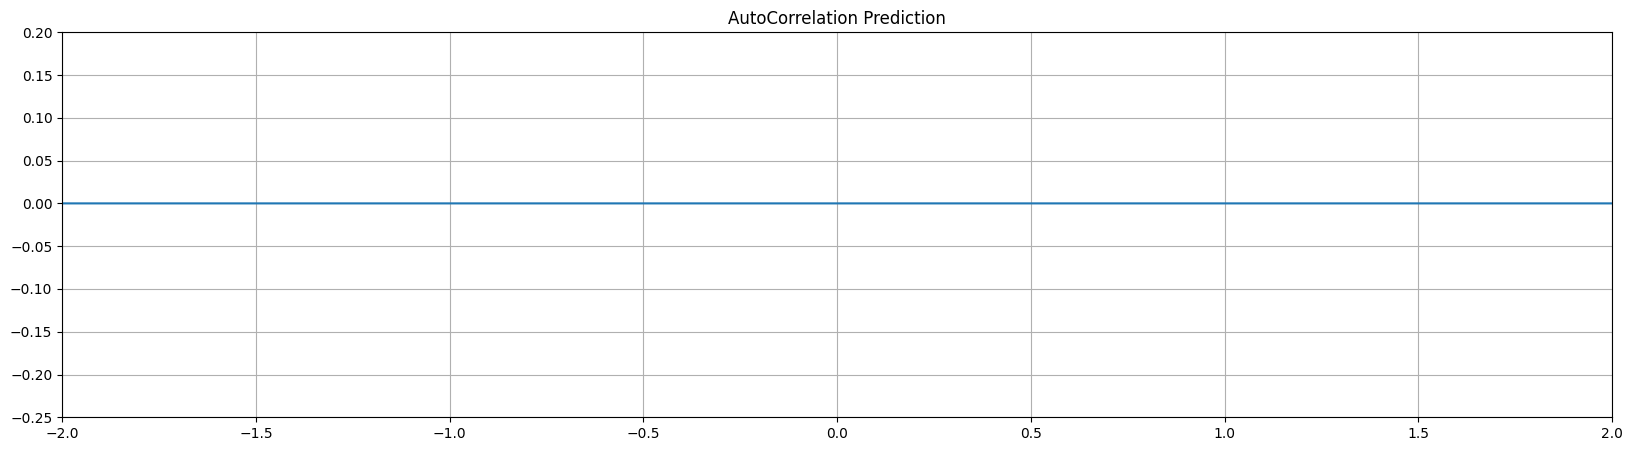

In [78]:
#Autocerrelación Entrada, salida circuito, salida red
Autocorrelation_step=autocross(noise_sine,noise_sine)
Autocorrelation_Output_step=autocross(Output_Circuit_step,Output_Circuit_step)


# Entrada Step
plt.figure(figsize=(20,5))
plt.plot(t-2,Autocorrelation_step)
plt.xlim(-2,2)
plt.ylim(-0.25,0.2)
hist_kws={"edgecolor":"black"}
plt.title("AutoCorrelation Entrance")
plt.grid()
plt.show()


# Salida SLIT
plt.figure(figsize=(20,5))
plt.plot(t-2,Autocorrelation_Output_step)
plt.xlim(-2,2)
plt.ylim(-0.25,0.2)
hist_kws={"edgecolor":"black"}
plt.title("AutoCorrelation Salida")
plt.grid()
plt.show()

# Predicción
plt.figure(figsize=(20,5))
plt.plot(t_predict-2,Autocorrelation_Prediction)
plt.xlim(-2,2)
plt.ylim(-0.25,0.2)
hist_kws={"edgecolor":"black"}
plt.title("AutoCorrelation Prediction")
plt.grid()
plt.show()

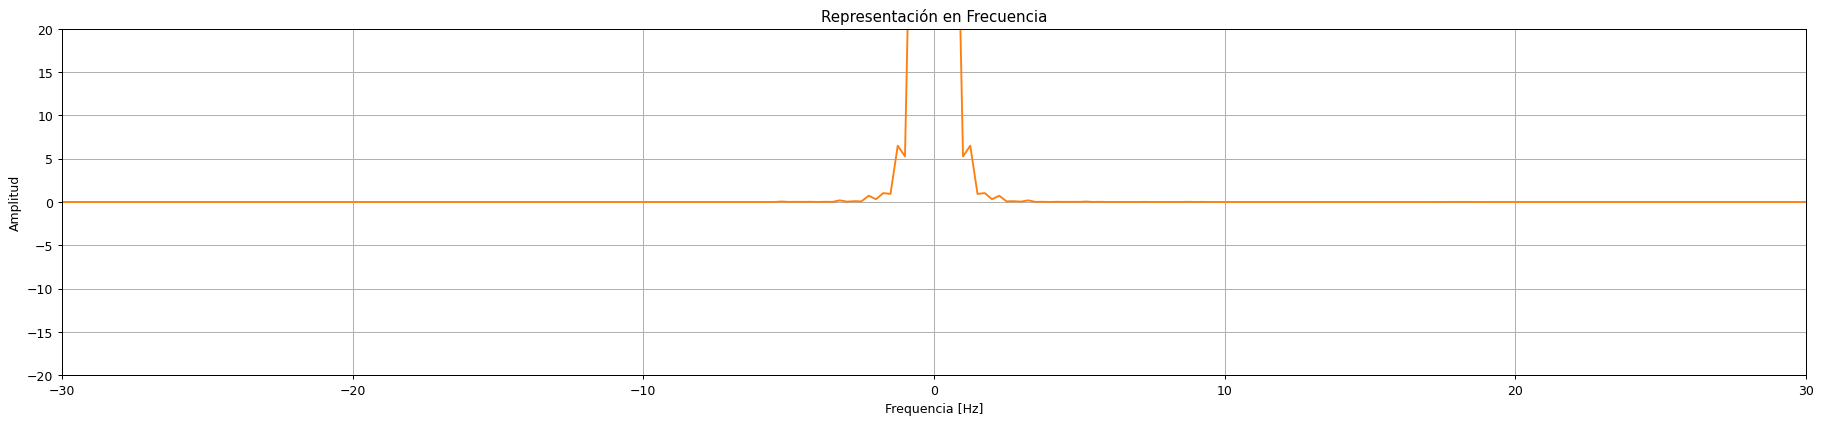

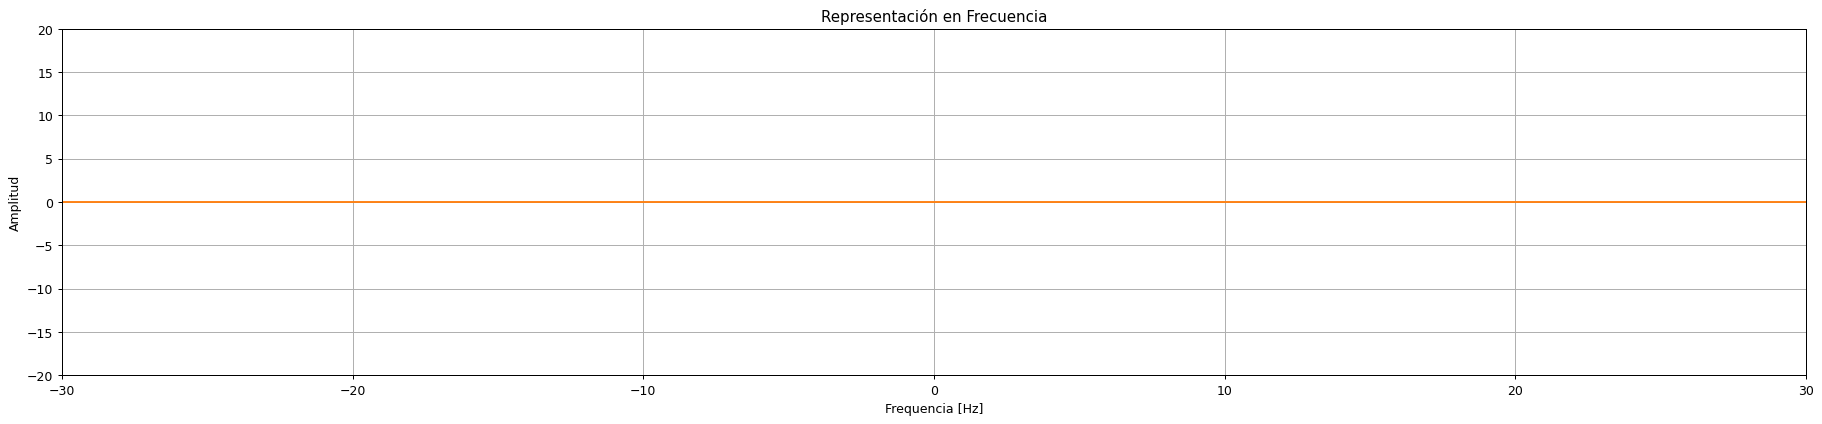

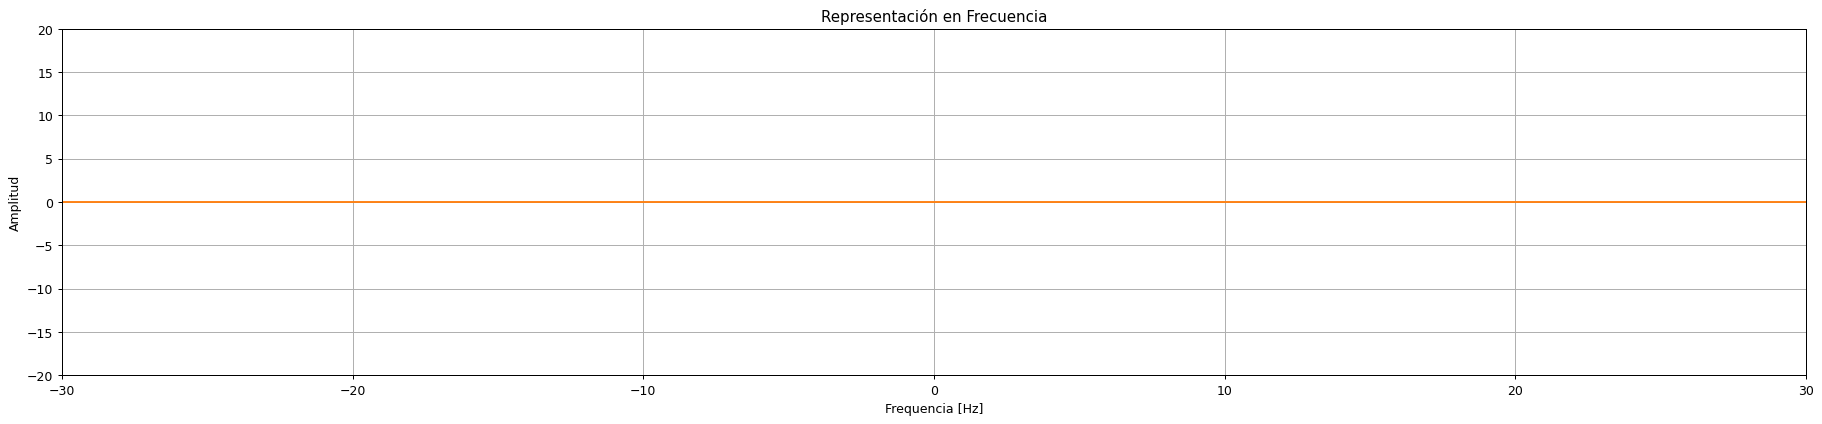

In [79]:
_ = Ploteo_tiempo_frecuencia2(t,Autocorrelation_noise_step,xmax=30,ymax=20)  # Espectro de potencia entrada del sistema

_ = Ploteo_tiempo_frecuencia2(t,Autocorrelation_Output_step,xmax=30,ymax=20) # Espectro de potencia salida del sistema

_ = Ploteo_tiempo_frecuencia2(t_predict,Autocorrelation_Prediction,xmax=30,ymax=20) # Espectro de potencia salida de la red

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e0d0255b-bc4b-4243-b52b-2044b30cc2ad' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>